# INDEX

### 1. Exploring data till cell 12
### 2. Visualizing correlation between different properties from cell 13 to cell 27
### 3. Model-1 (cell 28 to 32)
### 4. Model-2 (cell 33 to 37)
### 5. Model-3 (cell 38 to 42)

In [60]:
# Importing necessary libraries
import numpy as np
import pandas as pd
import pathway as pw
import matplotlib.pyplot as plt
import seaborn as sns

In [61]:
# reading data
df = pd.read_csv('dataset.csv')
df

ID SystemCodeNumber  Capacity   Latitude  Longitude  Occupancy  \
0          0      BHMBCCMKT01       577  26.144536  91.736172         61   
1          1      BHMBCCMKT01       577  26.144536  91.736172         64   
2          2      BHMBCCMKT01       577  26.144536  91.736172         80   
3          3      BHMBCCMKT01       577  26.144536  91.736172        107   
4          4      BHMBCCMKT01       577  26.144536  91.736172        150   
...      ...              ...       ...        ...        ...        ...   
18363  18363         Shopping      1920  26.150504  91.733531       1517   
18364  18364         Shopping      1920  26.150504  91.733531       1487   
18365  18365         Shopping      1920  26.150504  91.733531       1432   
18366  18366         Shopping      1920  26.150504  91.733531       1321   
18367  18367         Shopping      1920  26.150504  91.733531       1180   

      VehicleType TrafficConditionNearby  QueueLength  IsSpecialDay  \
0             car                    low            1             0   
1             car                    low            1             0   
2             car                    low            2             0   
3             car                    low            2             0   
4            bike                    low            2             0   
...           ...                    ...          ...           ...   
18363       truck                average            6             0   
18364         car                    low            3             0   
18365       cycle                    low            3             0   
18366         car                    low            2             0   
18367         car                    low            2             0   

      LastUpdatedDate LastUpdatedTime  
0          04-10-2016        07:59:00  
1          04-10-2016        08:25:00  
2          04-10-2016        08:59:00  
3          04-10-2016        09:32:00  
4          04-10-2016        09:59:00  
...               ...             ...  
18363      19-12-2016        14:30:00  
18364      19-12-2016        15:03:00  
18365      19-12-2016        15:29:00  
18366      19-12-2016        16:03:00  
18367      19-12-2016        16:30:00  

[18368 rows x 12 columns]

In [62]:
df.shape

(18368, 12)

In [63]:
df.info() # no-null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18368 entries, 0 to 18367
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   ID                      18368 non-null  int64  
 1   SystemCodeNumber        18368 non-null  object 
 2   Capacity                18368 non-null  int64  
 3   Latitude                18368 non-null  float64
 4   Longitude               18368 non-null  float64
 5   Occupancy               18368 non-null  int64  
 6   VehicleType             18368 non-null  object 
 7   TrafficConditionNearby  18368 non-null  object 
 8   QueueLength             18368 non-null  int64  
 9   IsSpecialDay            18368 non-null  int64  
 10  LastUpdatedDate         18368 non-null  object 
 11  LastUpdatedTime         18368 non-null  object 
dtypes: float64(2), int64(5), object(5)
memory usage: 1.7+ MB


In [64]:
df.loc[df['SystemCodeNumber'] == 'Shopping', 'LastUpdatedDate'].unique() # list of dates that are covered in this dataset

array(['04-10-2016', '05-10-2016', '06-10-2016', '07-10-2016',
       '08-10-2016', '09-10-2016', '10-10-2016', '11-10-2016',
       '12-10-2016', '13-10-2016', '14-10-2016', '15-10-2016',
       '16-10-2016', '17-10-2016', '18-10-2016', '19-10-2016',
       '22-10-2016', '23-10-2016', '24-10-2016', '25-10-2016',
       '26-10-2016', '27-10-2016', '28-10-2016', '29-10-2016',
       '30-10-2016', '31-10-2016', '01-11-2016', '02-11-2016',
       '03-11-2016', '04-11-2016', '05-11-2016', '06-11-2016',
       '07-11-2016', '08-11-2016', '09-11-2016', '10-11-2016',
       '11-11-2016', '12-11-2016', '13-11-2016', '14-11-2016',
       '15-11-2016', '16-11-2016', '17-11-2016', '18-11-2016',
       '19-11-2016', '20-11-2016', '21-11-2016', '22-11-2016',
       '23-11-2016', '24-11-2016', '25-11-2016', '26-11-2016',
       '27-11-2016', '28-11-2016', '29-11-2016', '30-11-2016',
       '01-12-2016', '02-12-2016', '05-12-2016', '06-12-2016',
       '07-12-2016', '08-12-2016', '09-12-2016', '10-12

In [65]:
capacity = df.groupby('SystemCodeNumber')['Capacity'].unique()
capacity

SystemCodeNumber
BHMBCCMKT01          [577]
BHMBCCTHL01          [387]
BHMEURBRD01          [470]
BHMMBMMBX01          [687]
BHMNCPHST01         [1200]
BHMNCPNST01          [485]
Broad Street         [690]
Others-CCCPS105a    [2009]
Others-CCCPS119a    [2803]
Others-CCCPS135a    [3883]
Others-CCCPS202     [2937]
Others-CCCPS8       [1322]
Others-CCCPS98      [3103]
Shopping            [1920]
Name: Capacity, dtype: object

In [66]:
df[df['Capacity'] < df['Occupancy']] #The lot BHMBCCTHL01 has 387 capacity but the max occupancy actually goes upto 403 and therefore changing that

ID SystemCodeNumber  Capacity   Latitude  Longitude  Occupancy  \
2076  2076      BHMBCCTHL01       387  26.144495  91.736205        390   
2077  2077      BHMBCCTHL01       387  26.144495  91.736205        392   
2078  2078      BHMBCCTHL01       387  26.144495  91.736205        390   
2079  2079      BHMBCCTHL01       387  26.144495  91.736205        394   
2080  2080      BHMBCCTHL01       387  26.144495  91.736205        394   
...    ...              ...       ...        ...        ...        ...   
2619  2619      BHMBCCTHL01       387  26.144495  91.736205        401   
2620  2620      BHMBCCTHL01       387  26.144495  91.736205        399   
2621  2621      BHMBCCTHL01       387  26.144495  91.736205        402   
2622  2622      BHMBCCTHL01       387  26.144495  91.736205        392   
5240  5240      BHMMBMMBX01       687  20.000035  78.000003        688   

     VehicleType TrafficConditionNearby  QueueLength  IsSpecialDay  \
2076        bike                   high            8             0   
2077         car                   high            8             0   
2078         car                   high            7             0   
2079         car                   high            7             0   
2080       truck                average            4             0   
...          ...                    ...          ...           ...   
2619        bike                average            4             0   
2620         car                    low            3             0   
2621         car                    low            3             0   
2622        bike                average            3             0   
5240         car                   high            8             0   

     LastUpdatedDate LastUpdatedTime  
2076      17-11-2016        12:04:00  
2077      17-11-2016        12:31:00  
2078      17-11-2016        13:04:00  
2079      17-11-2016        13:31:00  
2080      17-11-2016        14:04:00  
...              ...             ...  
2619      19-12-2016        14:30:00  
2620      19-12-2016        15:03:00  
2621      19-12-2016        15:29:00  
2622      19-12-2016        16:03:00  
5240      19-12-2016        13:03:00  

[241 rows x 12 columns]

In [67]:
max_occupancy = df.loc[df['SystemCodeNumber'] == 'BHMBCCTHL01', 'Occupancy'].max()
df.loc[df['SystemCodeNumber'] == 'BHMBCCTHL01', 'Capacity'] = max_occupancy

df[df.SystemCodeNumber == 'BHMBCCTHL01']

ID SystemCodeNumber  Capacity   Latitude  Longitude  Occupancy  \
1312  1312      BHMBCCTHL01       403  26.144495  91.736205        120   
1313  1313      BHMBCCTHL01       403  26.144495  91.736205        129   
1314  1314      BHMBCCTHL01       403  26.144495  91.736205        155   
1315  1315      BHMBCCTHL01       403  26.144495  91.736205        204   
1316  1316      BHMBCCTHL01       403  26.144495  91.736205        236   
...    ...              ...       ...        ...        ...        ...   
2619  2619      BHMBCCTHL01       403  26.144495  91.736205        401   
2620  2620      BHMBCCTHL01       403  26.144495  91.736205        399   
2621  2621      BHMBCCTHL01       403  26.144495  91.736205        402   
2622  2622      BHMBCCTHL01       403  26.144495  91.736205        392   
2623  2623      BHMBCCTHL01       403  26.144495  91.736205        387   

     VehicleType TrafficConditionNearby  QueueLength  IsSpecialDay  \
1312         car                    low            2             0   
1313         car                average            2             0   
1314         car                    low            2             0   
1315       cycle                    low            2             0   
1316         car                    low            2             0   
...          ...                    ...          ...           ...   
2619        bike                average            4             0   
2620         car                    low            3             0   
2621         car                    low            3             0   
2622        bike                average            3             0   
2623         car                    low            2             0   

     LastUpdatedDate LastUpdatedTime  
1312      04-10-2016        07:59:00  
1313      04-10-2016        08:25:00  
1314      04-10-2016        08:59:00  
1315      04-10-2016        09:32:00  
1316      04-10-2016        09:59:00  
...              ...             ...  
2619      19-12-2016        14:30:00  
2620      19-12-2016        15:03:00  
2621      19-12-2016        15:29:00  
2622      19-12-2016        16:03:00  
2623      19-12-2016        16:30:00  

[1312 rows x 12 columns]

In [68]:
# Creating a timestamp column combining LastUpdatedDate and LastUpdatedTime

df['Timestamp'] = pd.to_datetime(df['LastUpdatedDate'] + ' ' + df['LastUpdatedTime'],format='%d-%m-%Y %H:%M:%S')

df = df.sort_values('ID').reset_index(drop=True)

In [69]:
df = df.drop(['LastUpdatedTime', 'LastUpdatedDate'], axis=1)

df

ID SystemCodeNumber  Capacity   Latitude  Longitude  Occupancy  \
0          0      BHMBCCMKT01       577  26.144536  91.736172         61   
1          1      BHMBCCMKT01       577  26.144536  91.736172         64   
2          2      BHMBCCMKT01       577  26.144536  91.736172         80   
3          3      BHMBCCMKT01       577  26.144536  91.736172        107   
4          4      BHMBCCMKT01       577  26.144536  91.736172        150   
...      ...              ...       ...        ...        ...        ...   
18363  18363         Shopping      1920  26.150504  91.733531       1517   
18364  18364         Shopping      1920  26.150504  91.733531       1487   
18365  18365         Shopping      1920  26.150504  91.733531       1432   
18366  18366         Shopping      1920  26.150504  91.733531       1321   
18367  18367         Shopping      1920  26.150504  91.733531       1180   

      VehicleType TrafficConditionNearby  QueueLength  IsSpecialDay  \
0             car                    low            1             0   
1             car                    low            1             0   
2             car                    low            2             0   
3             car                    low            2             0   
4            bike                    low            2             0   
...           ...                    ...          ...           ...   
18363       truck                average            6             0   
18364         car                    low            3             0   
18365       cycle                    low            3             0   
18366         car                    low            2             0   
18367         car                    low            2             0   

                Timestamp  
0     2016-10-04 07:59:00  
1     2016-10-04 08:25:00  
2     2016-10-04 08:59:00  
3     2016-10-04 09:32:00  
4     2016-10-04 09:59:00  
...                   ...  
18363 2016-12-19 14:30:00  
18364 2016-12-19 15:03:00  
18365 2016-12-19 15:29:00  
18366 2016-12-19 16:03:00  
18367 2016-12-19 16:30:00  

[18368 rows x 11 columns]

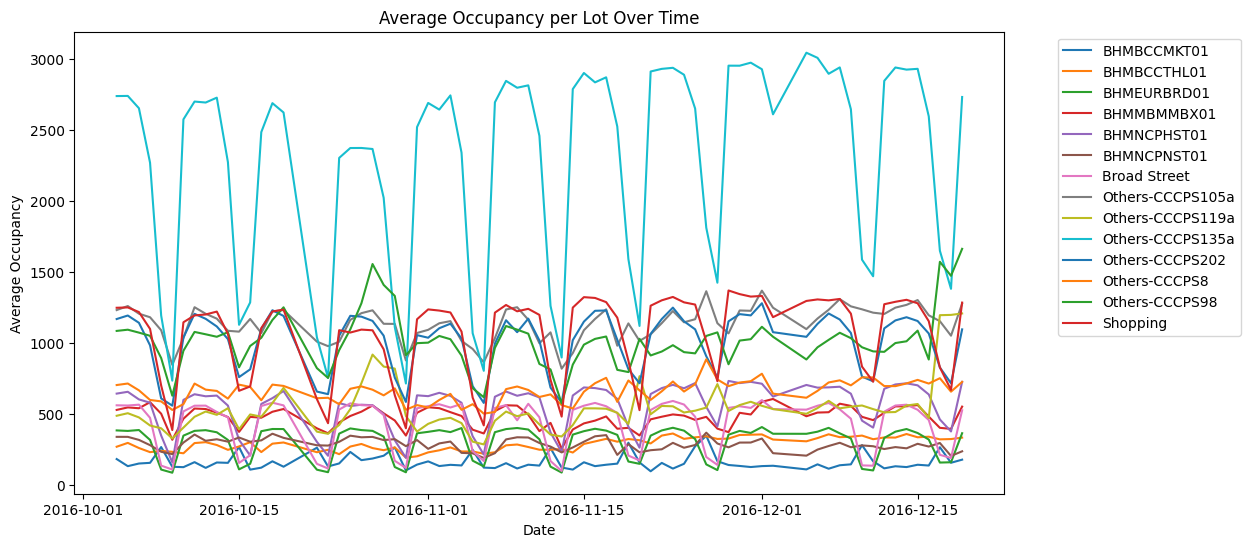

In [70]:
avg_occupancy = df.groupby([df['Timestamp'].dt.date, 'SystemCodeNumber'])['Occupancy'].mean().reset_index()

# 4. Pivot so each lot is its own line
pivot_df = avg_occupancy.pivot(index='Timestamp', columns='SystemCodeNumber', values='Occupancy')

# 5. Plot
pivot_df.plot(figsize=(12, 6))
plt.title('Average Occupancy per Lot Over Time')
plt.xlabel('Date')
plt.ylabel('Average Occupancy')
plt.legend(title='LotID')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

# This graph shows the average occupancy trend over the whole timeline

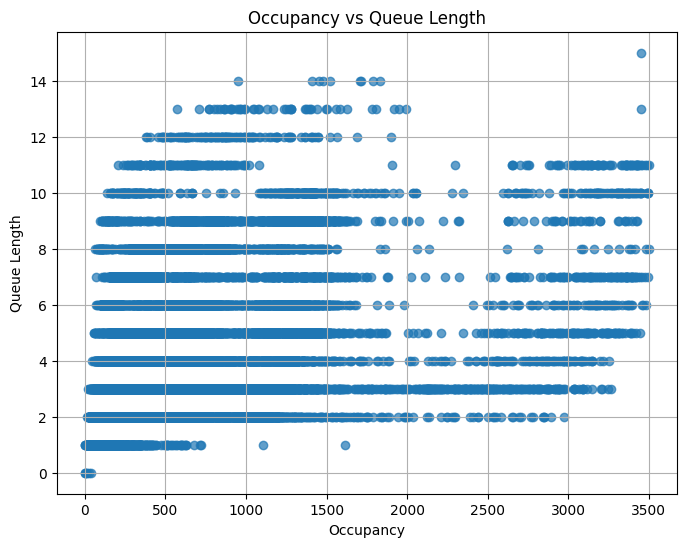

In [71]:
plt.figure(figsize=(8, 6))
plt.scatter(df['Occupancy'], df['QueueLength'], alpha=0.7)
plt.title('Occupancy vs Queue Length')
plt.xlabel('Occupancy')
plt.ylabel('Queue Length')
plt.grid(True)
plt.show()

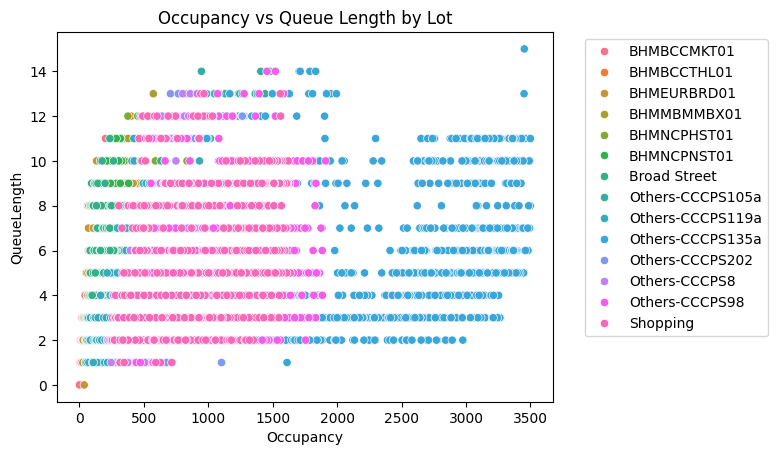

In [72]:
sns.scatterplot(
    data=df,
    x='Occupancy',
    y='QueueLength',
    hue='SystemCodeNumber'  # Replace with your actual lot column if you have one
)
plt.title('Occupancy vs Queue Length by Lot')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


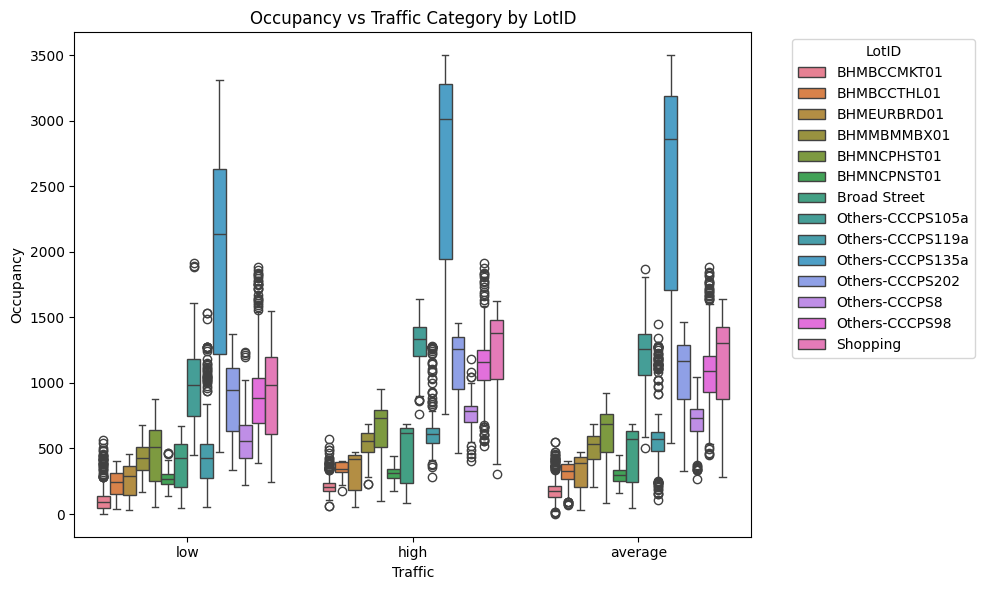

In [73]:
plt.figure(figsize=(10, 6))
sns.boxplot(
    x='TrafficConditionNearby',
    y='Occupancy',
    hue='SystemCodeNumber',  # color by LotID
    data=df
)
plt.title('Occupancy vs Traffic Category by LotID')
plt.xlabel('Traffic')
plt.ylabel('Occupancy')
plt.legend(title='LotID', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# This suggest that occupancy increases with traffic. Some plots have outliers though.

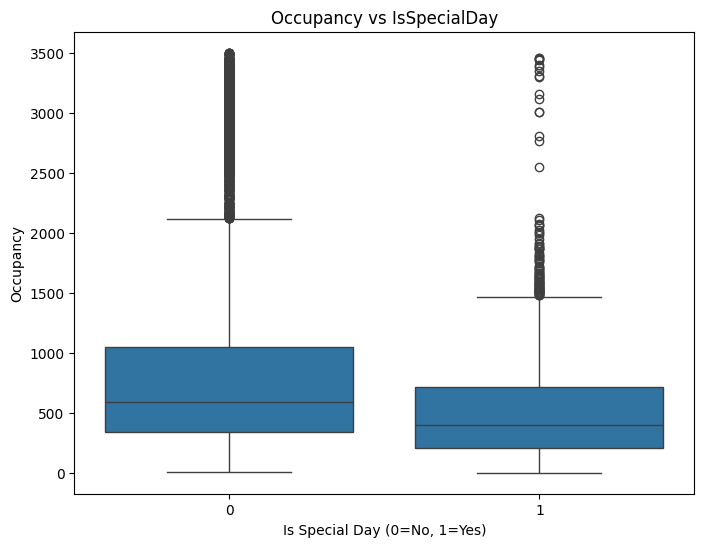

In [74]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='IsSpecialDay', y='Occupancy', data=df)
plt.title('Occupancy vs IsSpecialDay')
plt.xlabel('Is Special Day (0=No, 1=Yes)')
plt.ylabel('Occupancy')
plt.show()

# Suggesting that the occupancy usually decreases on some special day

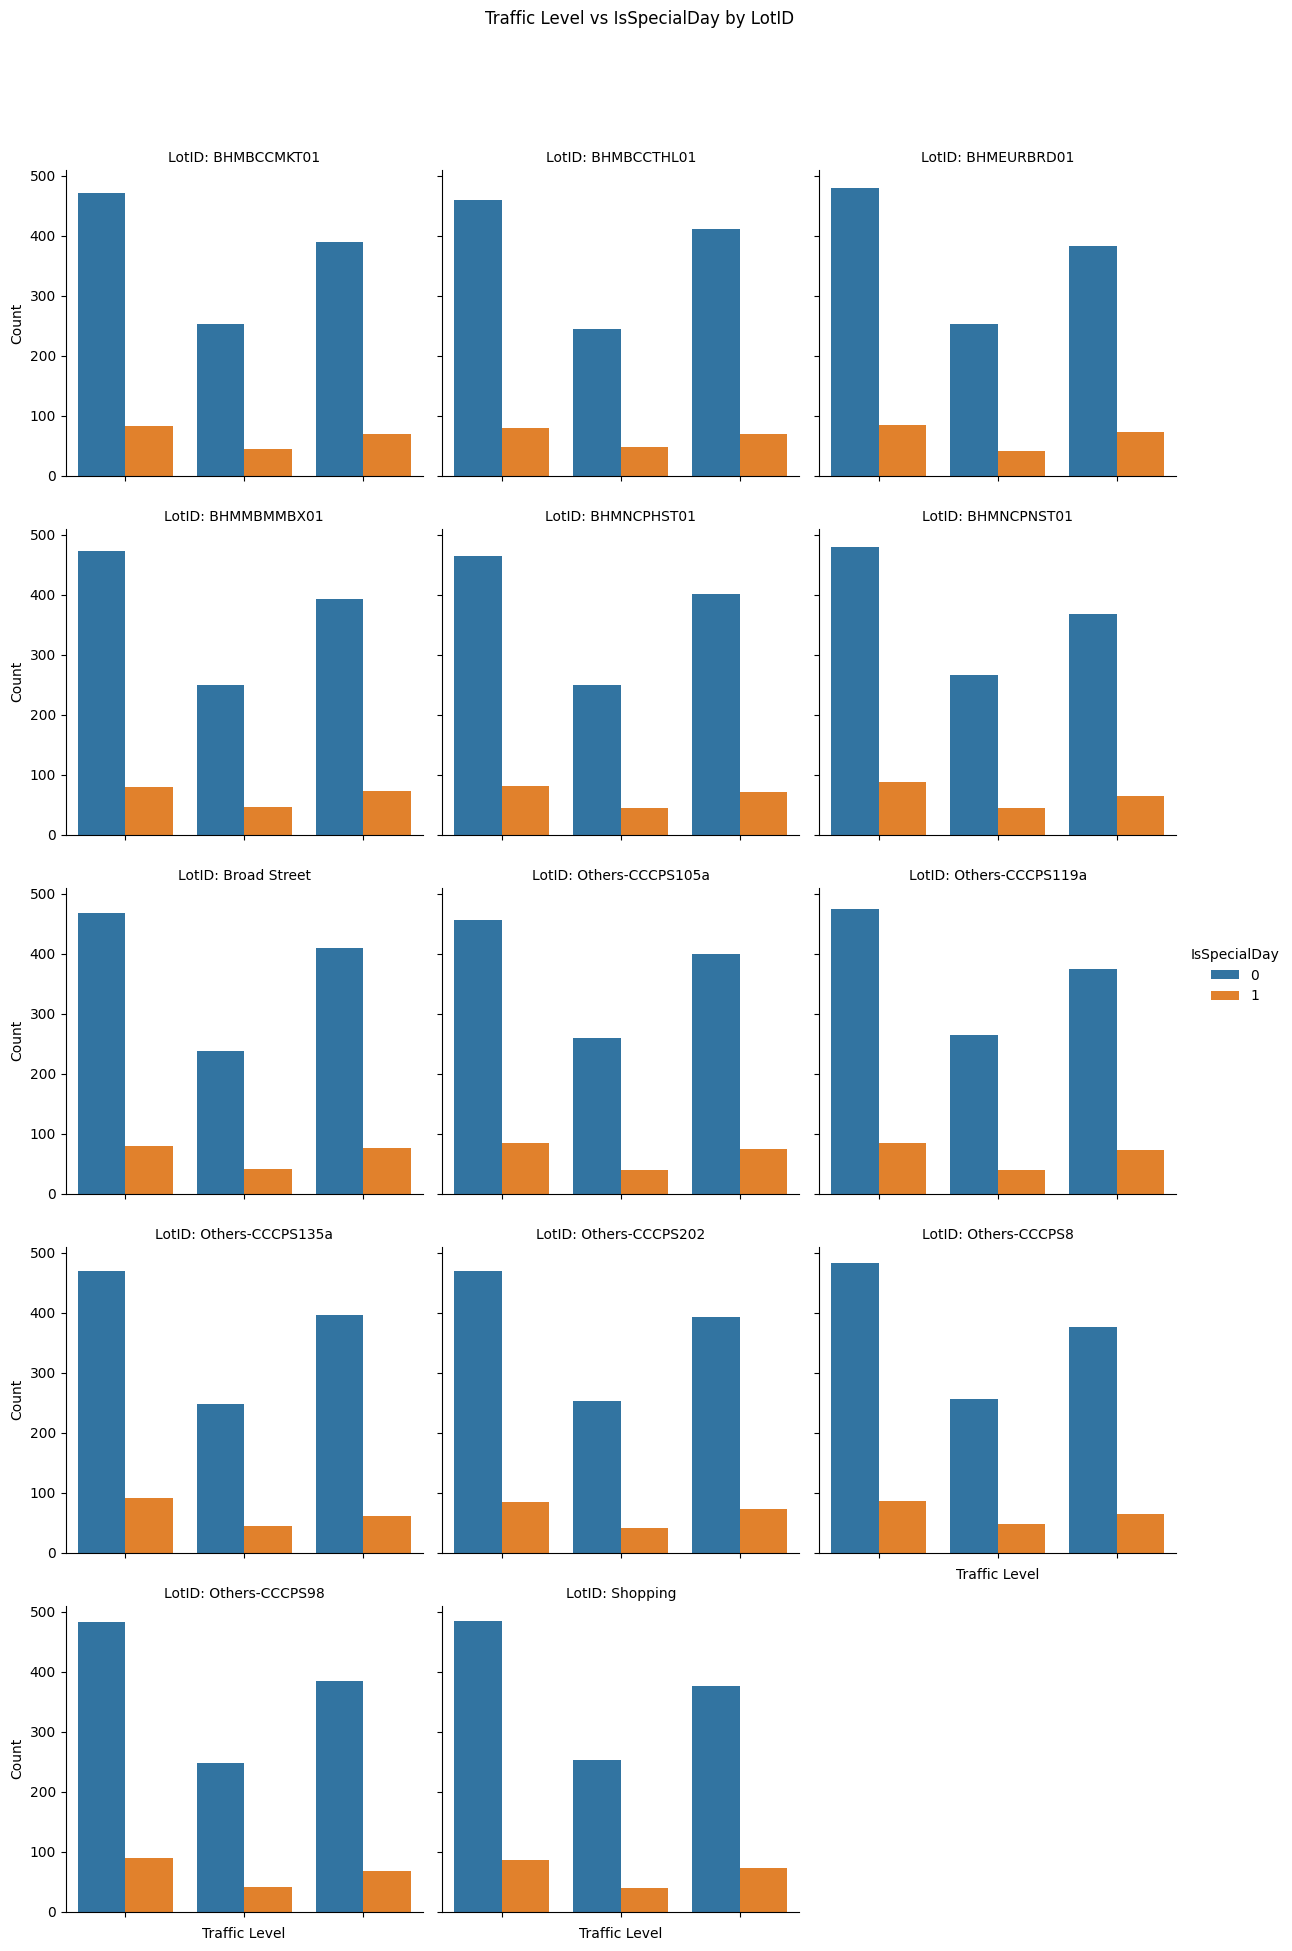

In [75]:
g = sns.catplot(
    data=df,
    kind='count',
    x='TrafficConditionNearby',
    hue='IsSpecialDay',
    col='SystemCodeNumber',
    col_wrap=3,  # controls how many plots per row
    height=4,
    aspect=1
)

g.set_axis_labels("Traffic Level", "Count")
g.set_titles("LotID: {col_name}")
g._legend.set_title("IsSpecialDay")
g.set_xticklabels(rotation=30)
plt.subplots_adjust(top=0.9)
g.fig.suptitle('Traffic Level vs IsSpecialDay by LotID')
plt.show()

# This plot isn't much helpful

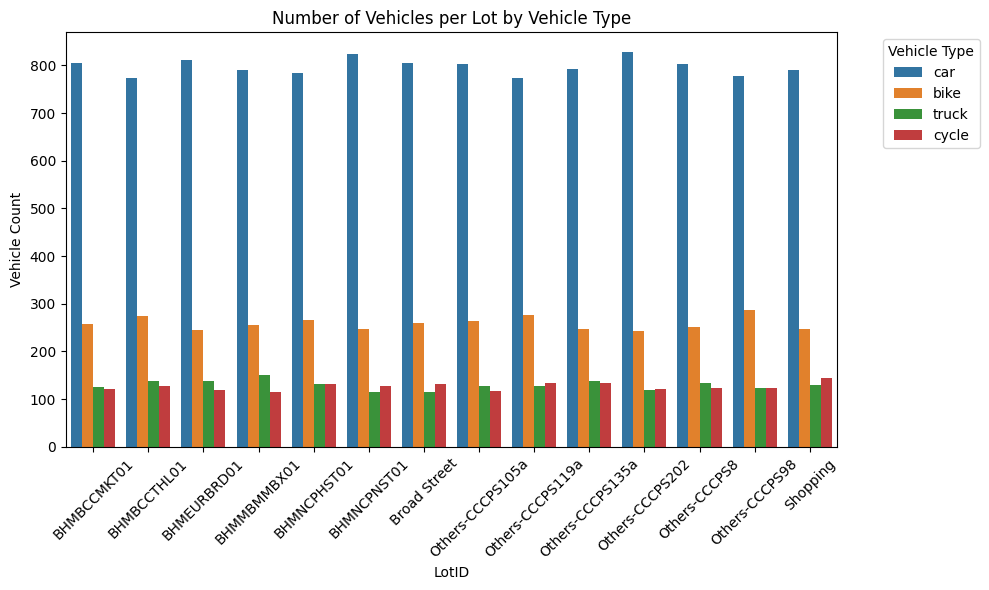

In [76]:
plt.figure(figsize=(10, 6))
sns.countplot(
    data=df,
    x='SystemCodeNumber',
    hue='VehicleType'
)

plt.title('Number of Vehicles per Lot by Vehicle Type')
plt.xlabel('LotID')
plt.ylabel('Vehicle Count')
plt.legend(title='Vehicle Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# This shows the no. of vehicles in each parking lot. We can charge cars and truck (due to its weight) higher than others.

In [77]:
df['VehicleType'].value_counts()
# The density of trucks are still high and therefore will give a higher price

VehicleType
car      11166
bike      3624
truck     1809
cycle     1769
Name: count, dtype: int64

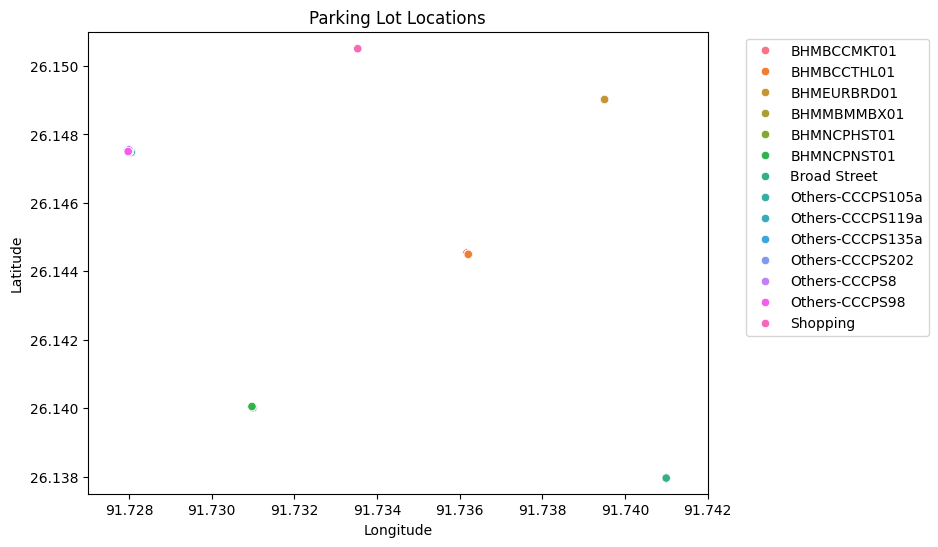

In [78]:
plt.figure(figsize=(8, 6))
sns.scatterplot(
    data=df,
    x='Longitude',
    y='Latitude',
    hue='SystemCodeNumber'
)
plt.xlim(91.727, 91.742)
plt.ylim(26.1375, 26.151)
plt.title('Parking Lot Locations')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

# This basically suggests that 'BHMMBMMBX01' is isolated from all others. And the other parking lots are clustered according to their similarity in code names

In [79]:
df.Latitude.unique()

array([26.14453614, 26.14449459, 26.14901995, 20.0000347 , 26.14001386,
       26.14004753, 26.13795775, 26.14747299, 26.14754061, 26.14749943,
       26.14749053, 26.14754886, 26.14749998, 26.15050395])

In [80]:
df.Longitude.unique()

array([91.73617216, 91.73620513, 91.7395035 , 78.00000286, 91.73099967,
       91.73097233, 91.74099445, 91.72804914, 91.72797041, 91.72800489,
       91.72799688, 91.72799519, 91.72797778, 91.73353109])

In [81]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18368 entries, 0 to 18367
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   ID                      18368 non-null  int64         
 1   SystemCodeNumber        18368 non-null  object        
 2   Capacity                18368 non-null  int64         
 3   Latitude                18368 non-null  float64       
 4   Longitude               18368 non-null  float64       
 5   Occupancy               18368 non-null  int64         
 6   VehicleType             18368 non-null  object        
 7   TrafficConditionNearby  18368 non-null  object        
 8   QueueLength             18368 non-null  int64         
 9   IsSpecialDay            18368 non-null  int64         
 10  Timestamp               18368 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(2), int64(5), object(3)
memory usage: 1.5+ MB


In [82]:
df_experimental = df.copy()
df_experimental['Hour'] = df_experimental['Timestamp'].dt.hour

def get_time_of_day(hour):
    if 6 <= hour <= 10:
        return 'Morning'
    elif 11 <= hour <= 15:
        return 'Midday'
    elif 16 <= hour <= 20:
        return 'Afternoon'
    else:
        return 'Other'

df_experimental['TimeOfDay'] = df_experimental['Hour'].apply(get_time_of_day)
print(df_experimental[['Timestamp', 'Hour', 'TimeOfDay']].head())
print(df_experimental['TimeOfDay'].value_counts())

            Timestamp  Hour TimeOfDay
0 2016-10-04 07:59:00     7   Morning
1 2016-10-04 08:25:00     8   Morning
2 2016-10-04 08:59:00     8   Morning
3 2016-10-04 09:32:00     9   Morning
4 2016-10-04 09:59:00     9   Morning
TimeOfDay
Midday       10214
Morning       6537
Afternoon     1617
Name: count, dtype: int64


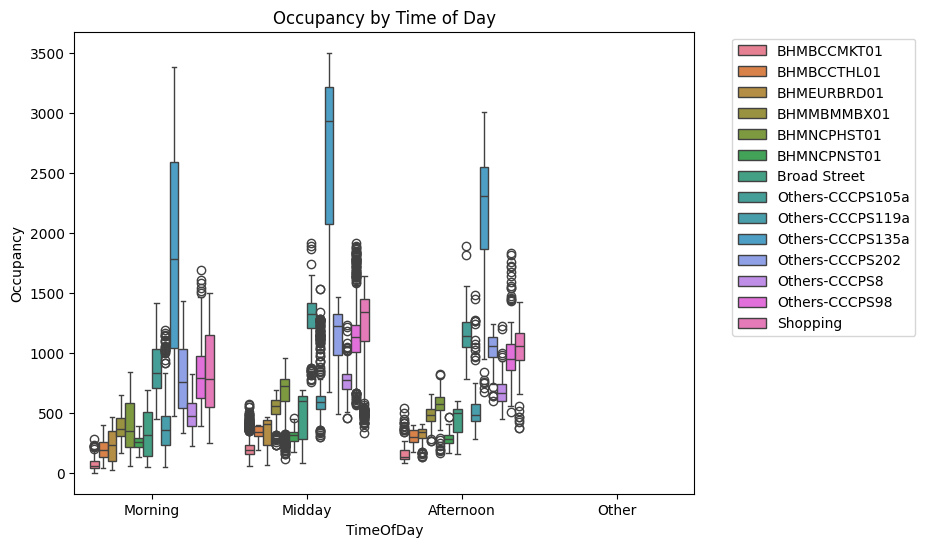

In [83]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='TimeOfDay', y='Occupancy', hue='SystemCodeNumber', data=df_experimental, order=['Morning', 'Midday', 'Afternoon', 'Other'])
plt.title('Occupancy by Time of Day')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

# This shows that MidDay is the busiest time

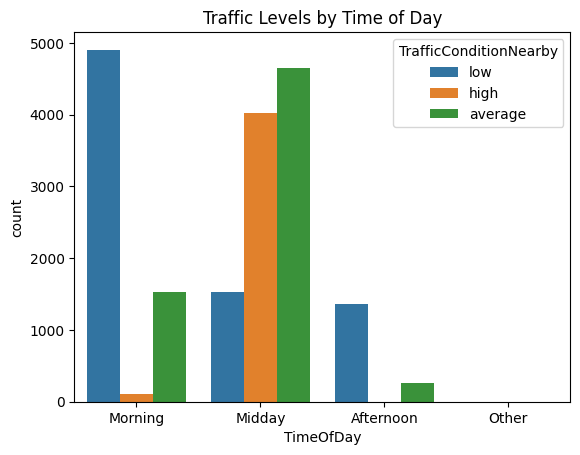

In [84]:
sns.countplot(x='TimeOfDay', hue='TrafficConditionNearby', data=df_experimental, order=['Morning', 'Midday', 'Afternoon', 'Other'])
plt.title('Traffic Levels by Time of Day')
plt.show()

### MODEL 1

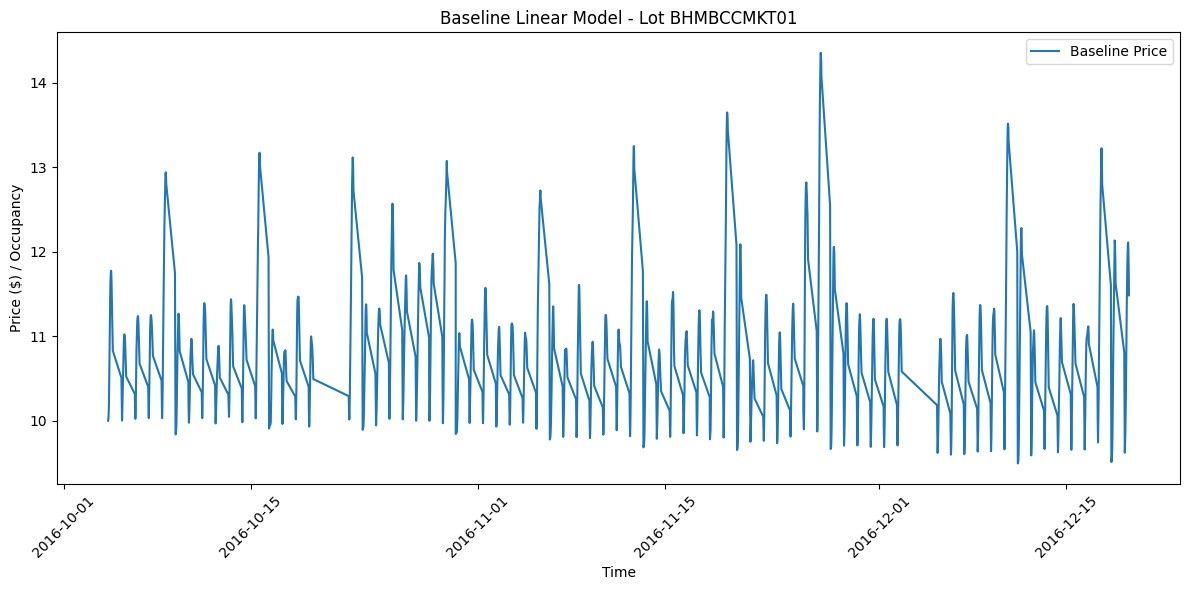

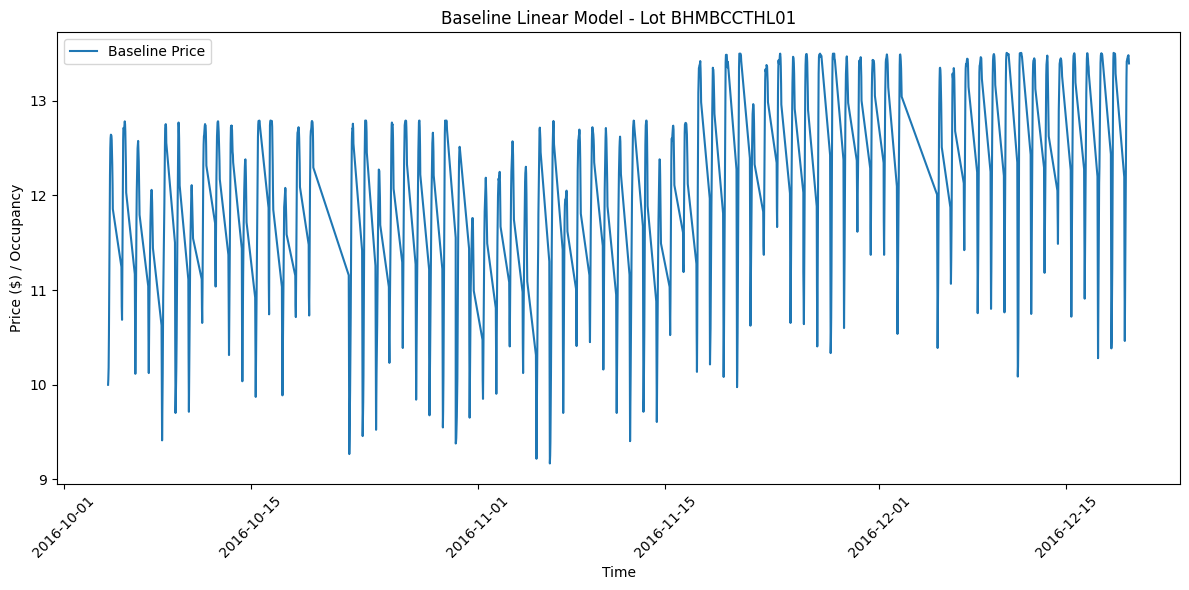

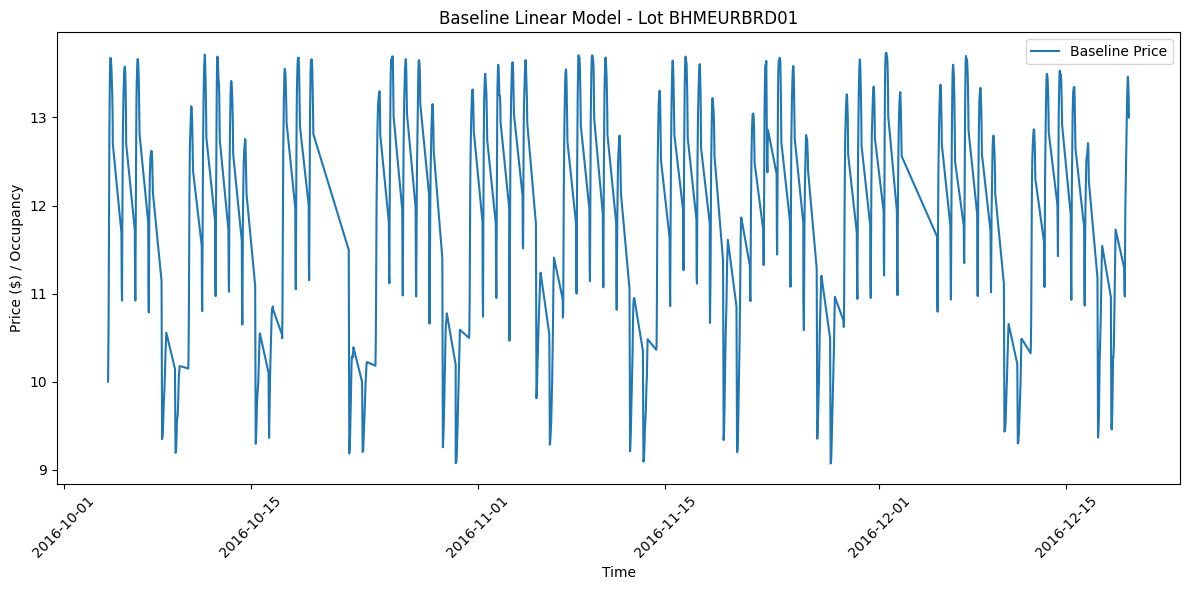

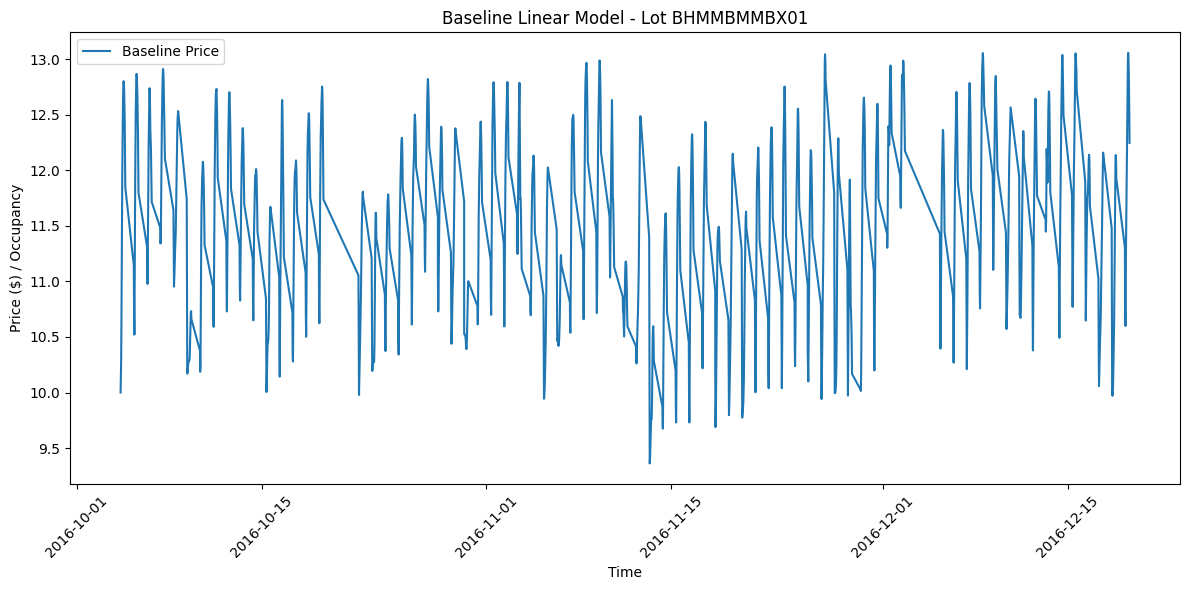

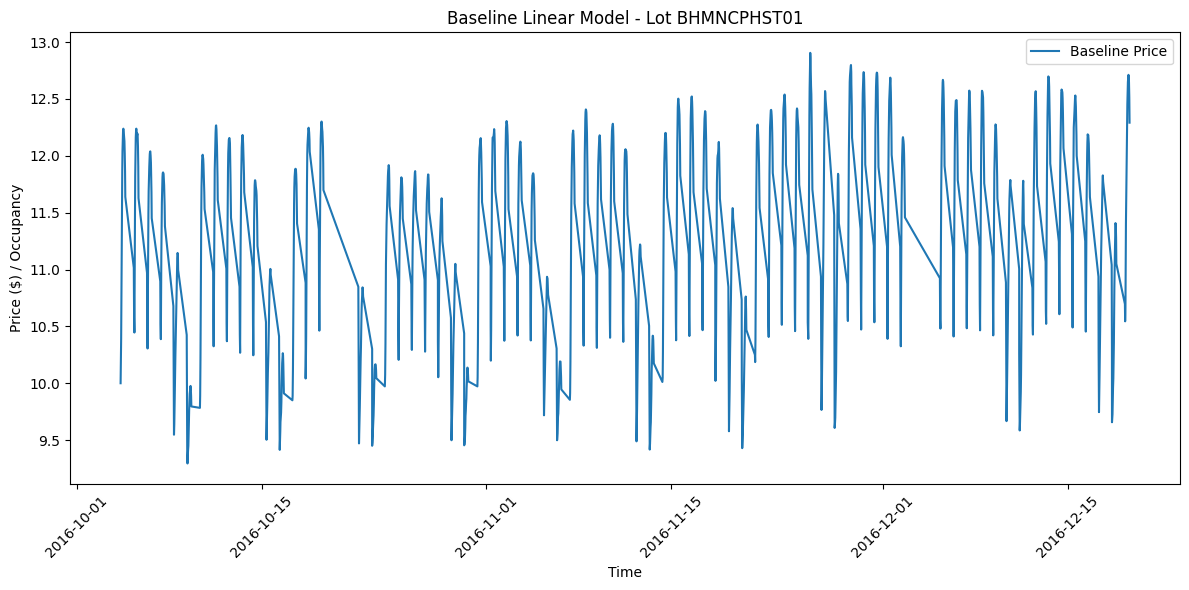

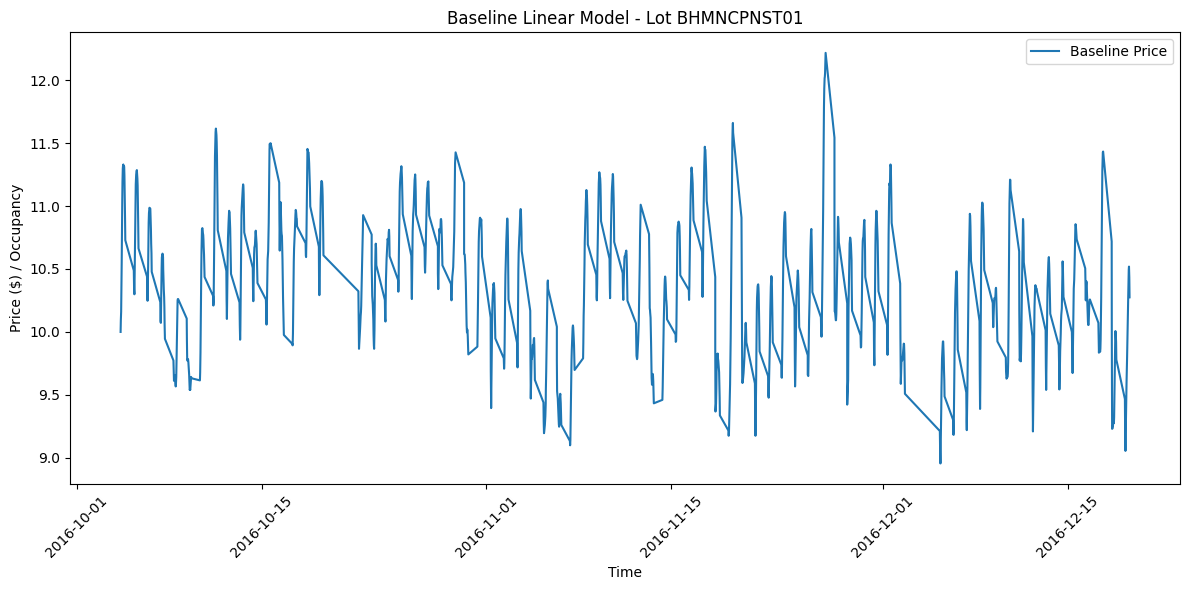

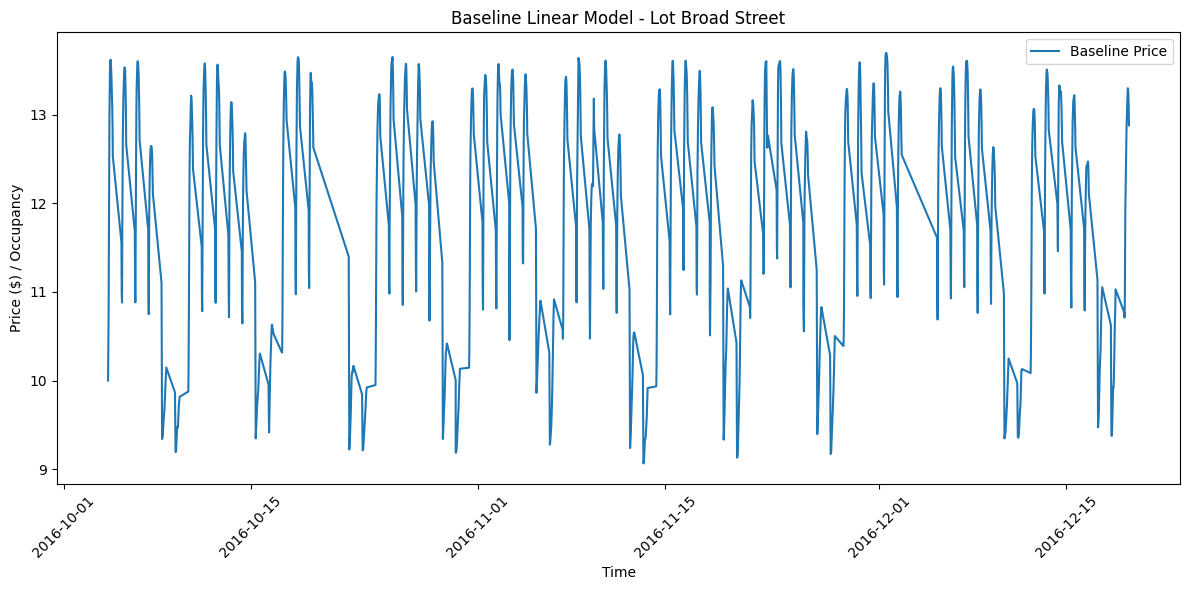

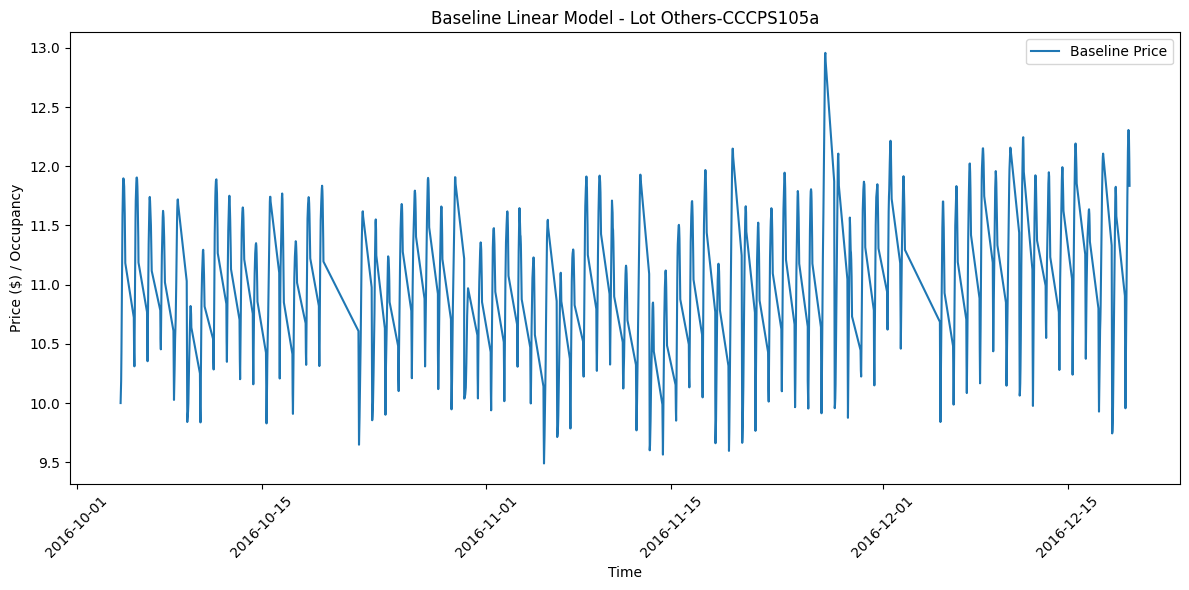

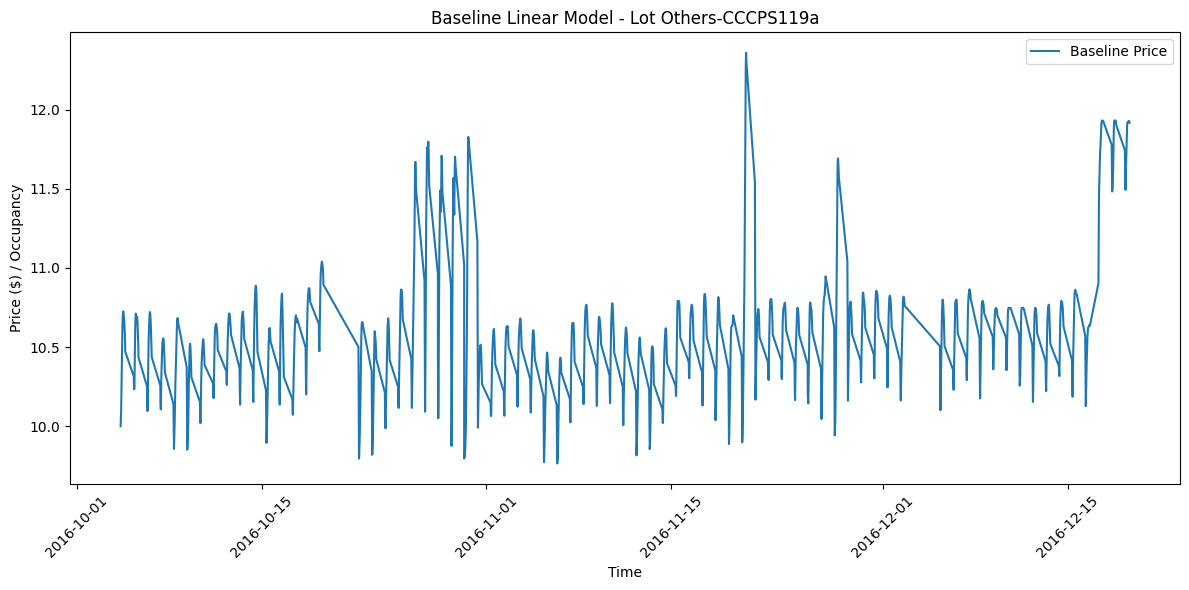

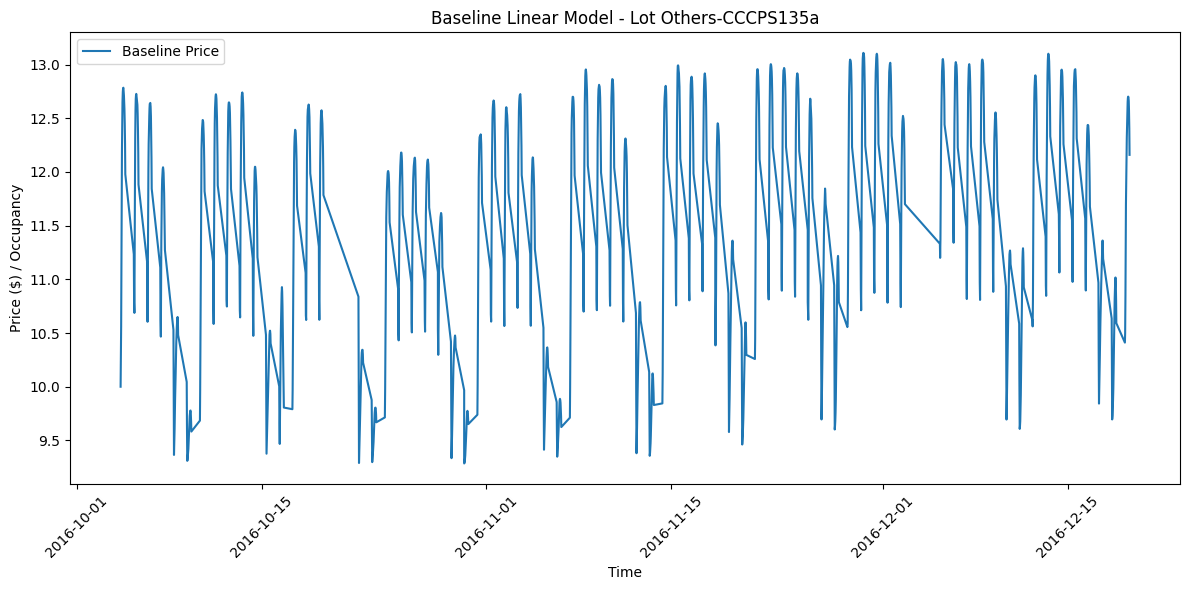

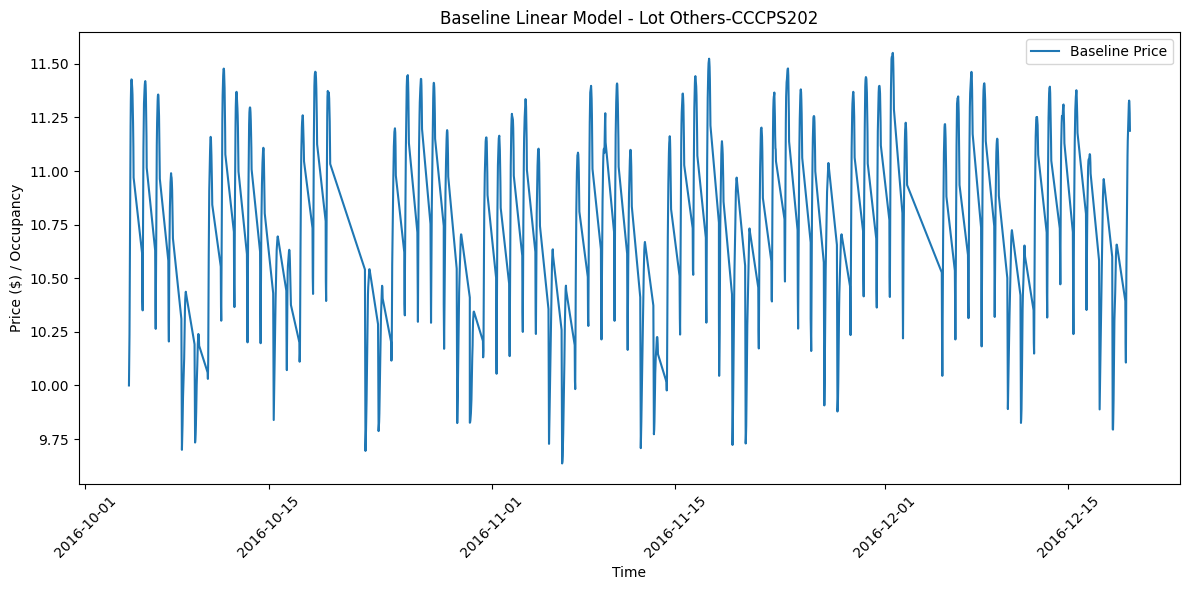

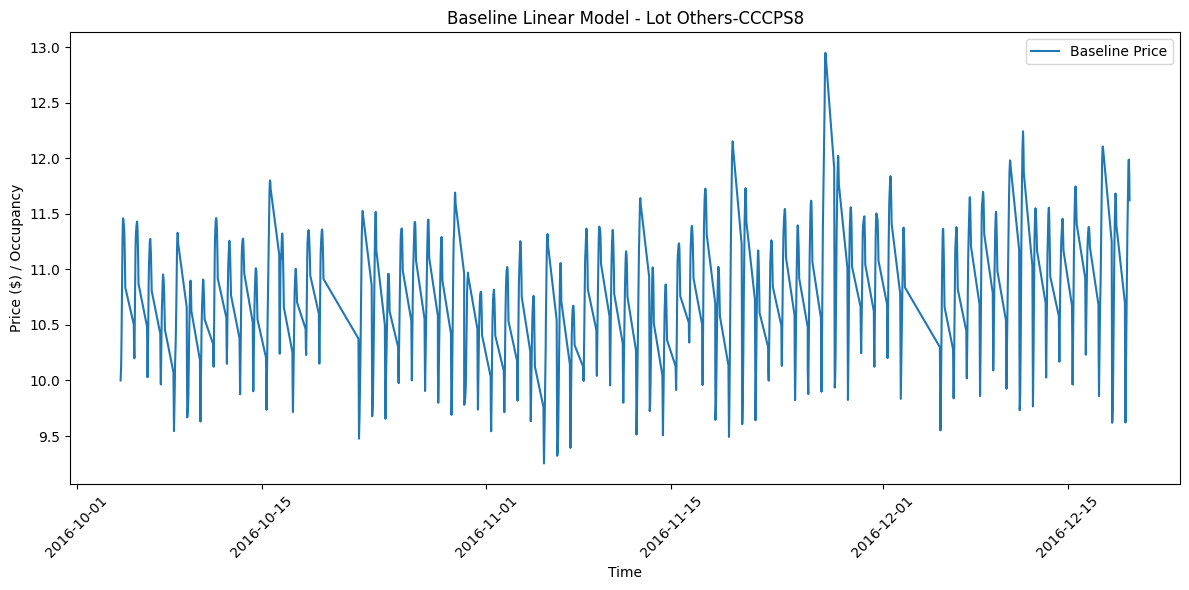

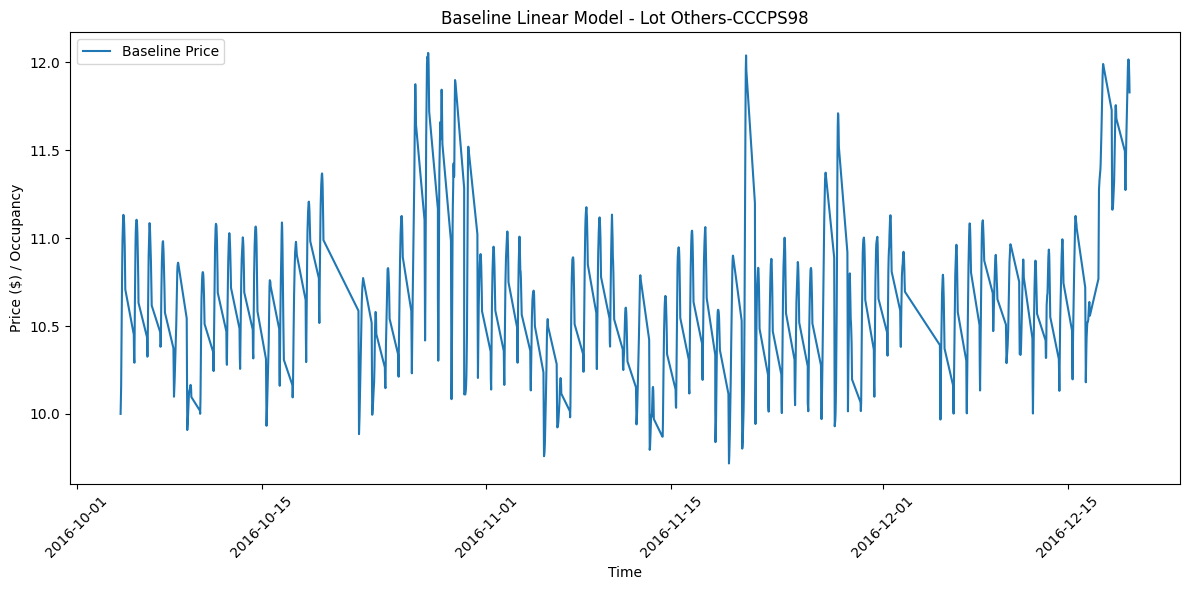

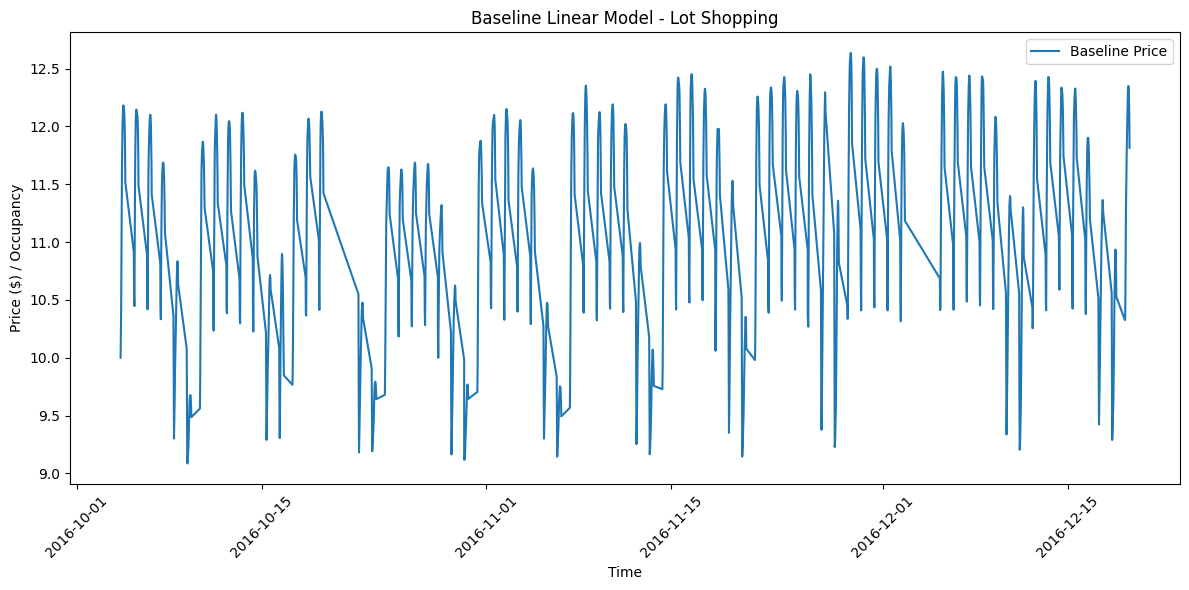

In [85]:
def baseline_linear_model(df, SystemCodeNumber, base_price=10.0, alpha=5):
    """
    Applies the baseline linear pricing model to a single lot.
    Parameters:
        df: DataFrame with your data
        SystemCodeNumber: Lot ID to filter
        base_price: Starting price ($)
        alpha: Sensitivity to occupancy rate
    Returns:
        DataFrame with added 'BaselinePrice' column
    """
    lot_df = df[df['SystemCodeNumber'] == SystemCodeNumber].copy()
    lot_df = lot_df.sort_values(by='Timestamp')

    prices = [base_price]  # initialize with base price

    for i in range(1, len(lot_df)):
        prev_occ_rate = lot_df.iloc[i-1]['Occupancy'] / lot_df.iloc[i-1]['Capacity']
        occ_rate = lot_df.iloc[i]['Occupancy'] / lot_df.iloc[i]['Capacity']
        lot_df['OccRate'] = lot_df['Occupancy'] / lot_df['Capacity']
        lot_df['OccRateSmooth'] = lot_df['OccRate'].rolling(window=3, min_periods=1).mean()

        delta_occ = lot_df.iloc[i]['OccRateSmooth'] - lot_df.iloc[i-1]['OccRateSmooth']
        max_step_change = 0.5
        delta = max(-max_step_change, min(delta_occ, max_step_change))

        new_price = prices[i-1] + alpha * delta

        # Optionally enforce bounds
        new_price = max(base_price * 0.5, min(new_price, base_price * 2))

        prices.append(new_price)

    lot_df['BaselinePrice'] = prices
    return lot_df


Lot = df.SystemCodeNumber.unique()

for lot_id in Lot:
    SystemCodeNumber = lot_id
    result_df = baseline_linear_model(df, SystemCodeNumber)
    
    plt.figure(figsize=(12, 6))
    plt.plot(result_df['Timestamp'], result_df['BaselinePrice'], label='Baseline Price')
    plt.title(f'Baseline Linear Model - Lot {SystemCodeNumber}')
    plt.xlabel('Time')
    plt.ylabel('Price ($) / Occupancy')
    plt.legend()
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

    


In [86]:
df.SystemCodeNumber.unique()

array(['BHMBCCMKT01', 'BHMBCCTHL01', 'BHMEURBRD01', 'BHMMBMMBX01',
       'BHMNCPHST01', 'BHMNCPNST01', 'Broad Street', 'Others-CCCPS105a',
       'Others-CCCPS119a', 'Others-CCCPS135a', 'Others-CCCPS202',
       'Others-CCCPS8', 'Others-CCCPS98', 'Shopping'], dtype=object)

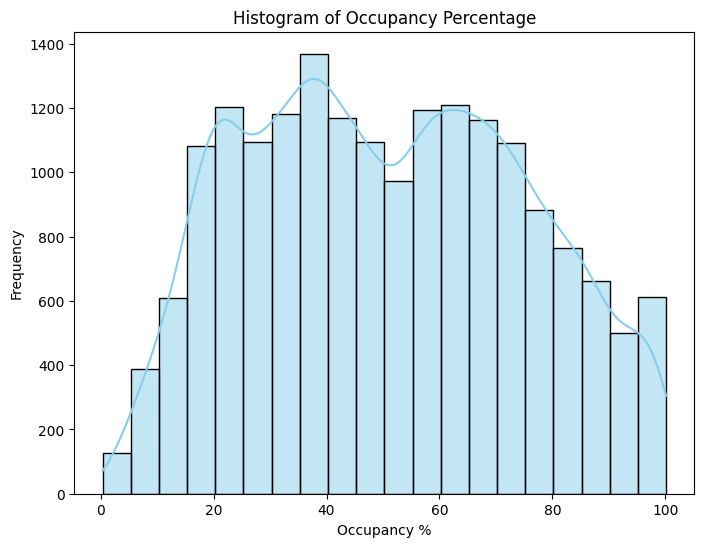

In [87]:
plt.figure(figsize=(8, 6))
sns.histplot((df['Occupancy'] / df['Capacity']) * 100, bins=20, kde=True, color='skyblue')
plt.title('Histogram of Occupancy Percentage')
plt.xlabel('Occupancy %')
plt.ylabel('Frequency')
plt.show()

In [88]:
df.QueueLength.max()

np.int64(15)

### MODEL 2

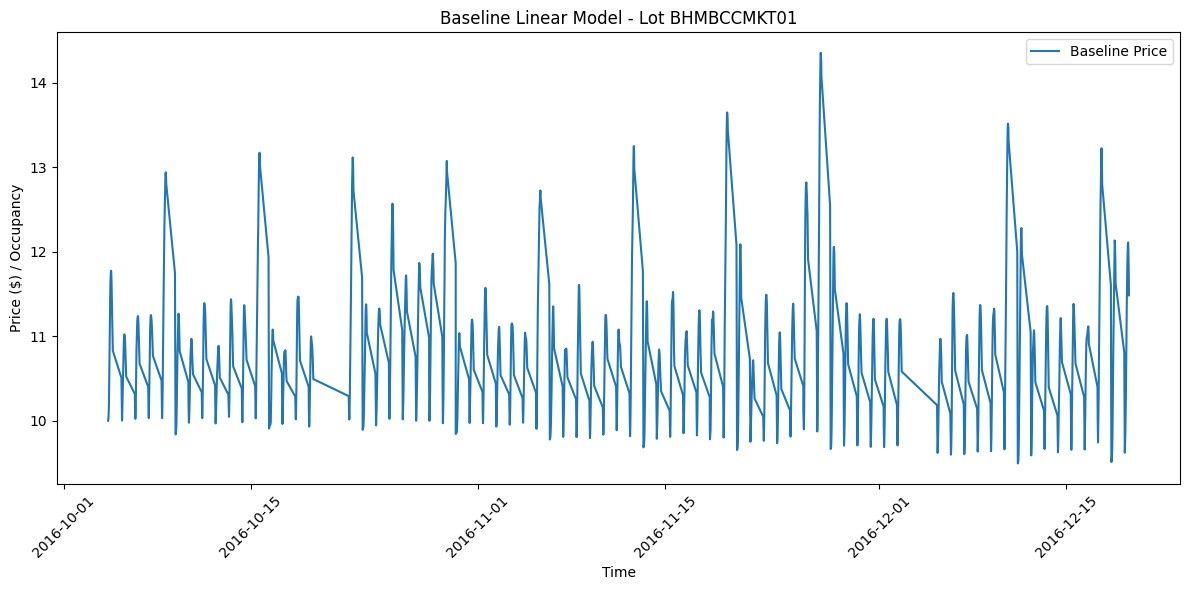

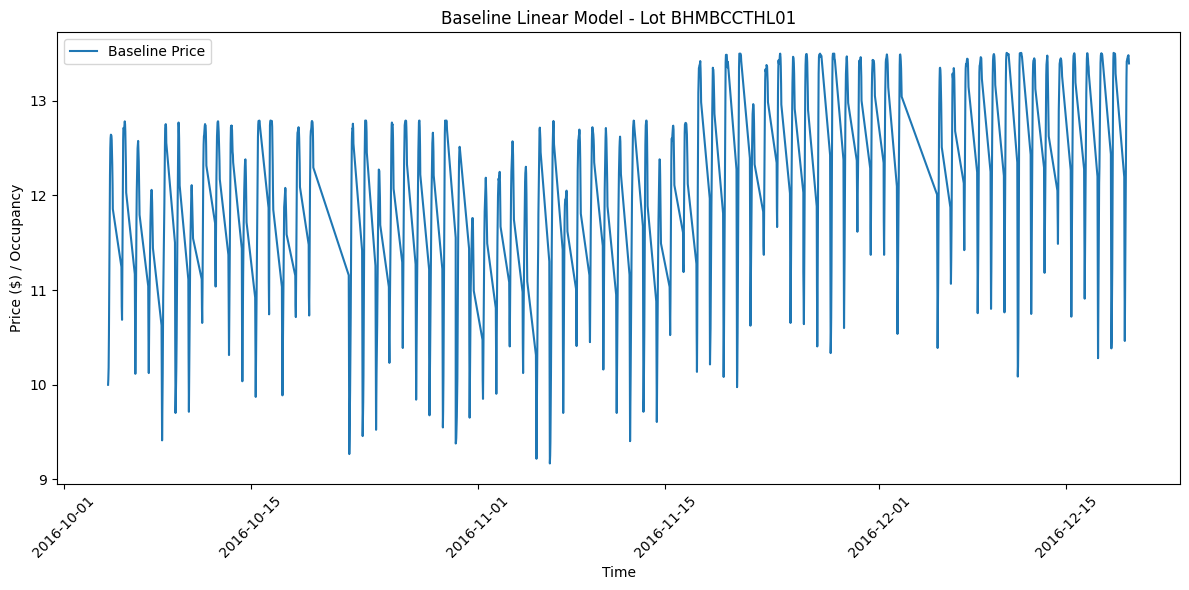

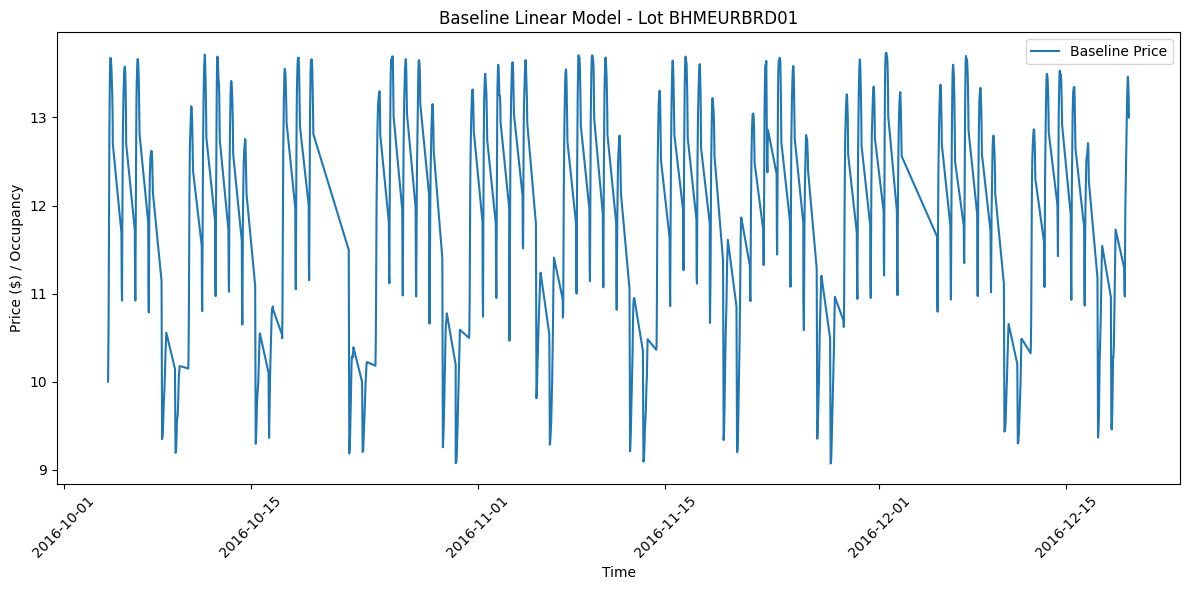

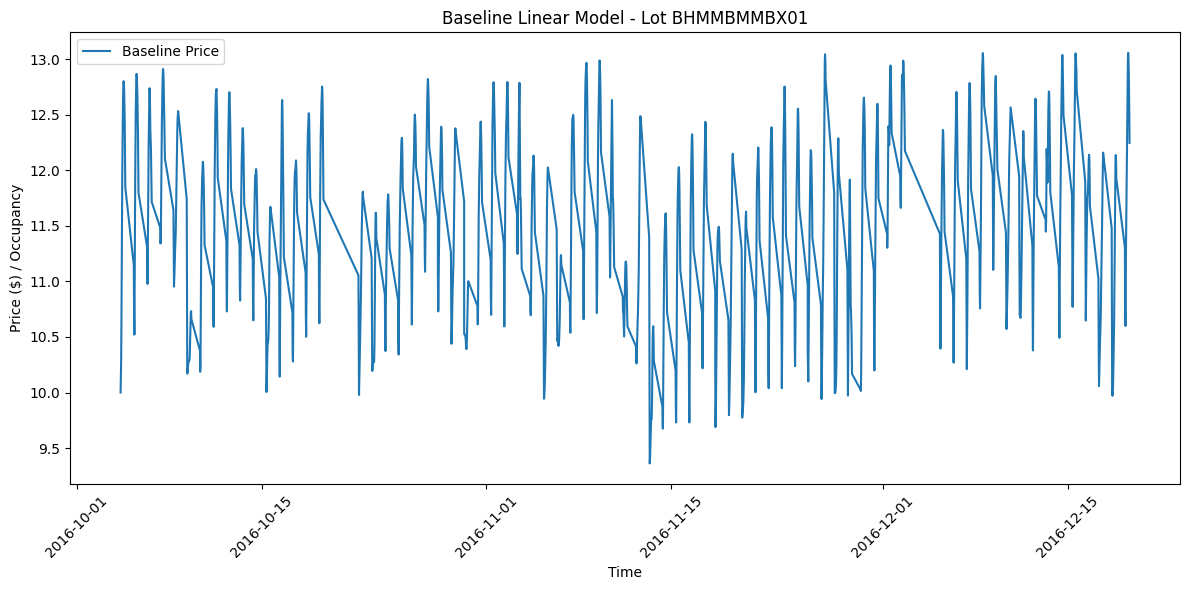

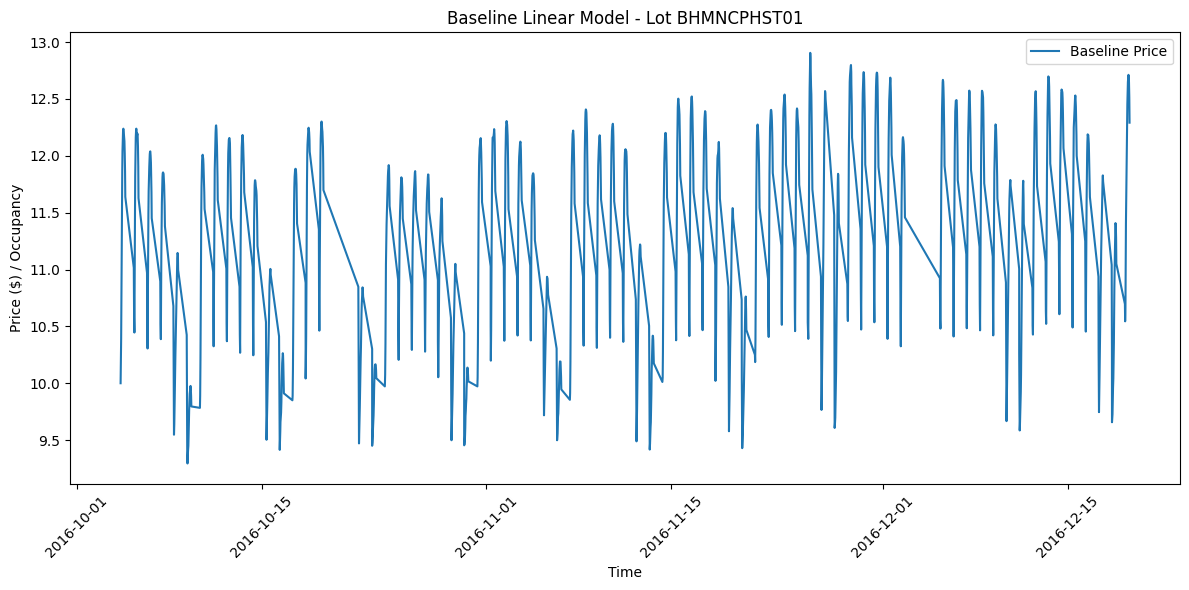

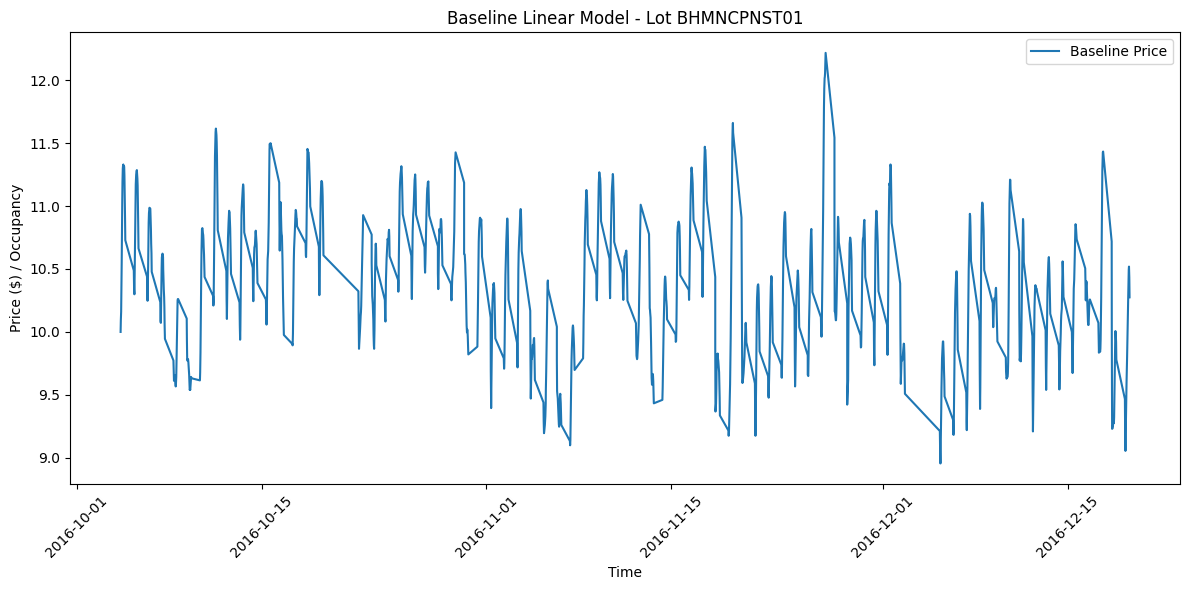

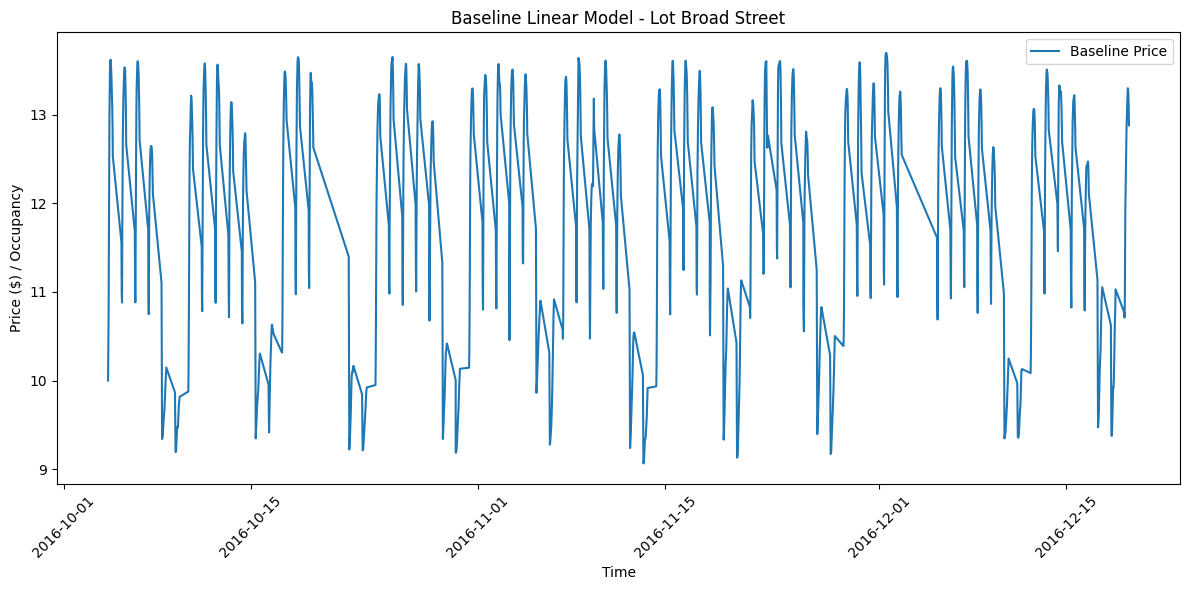

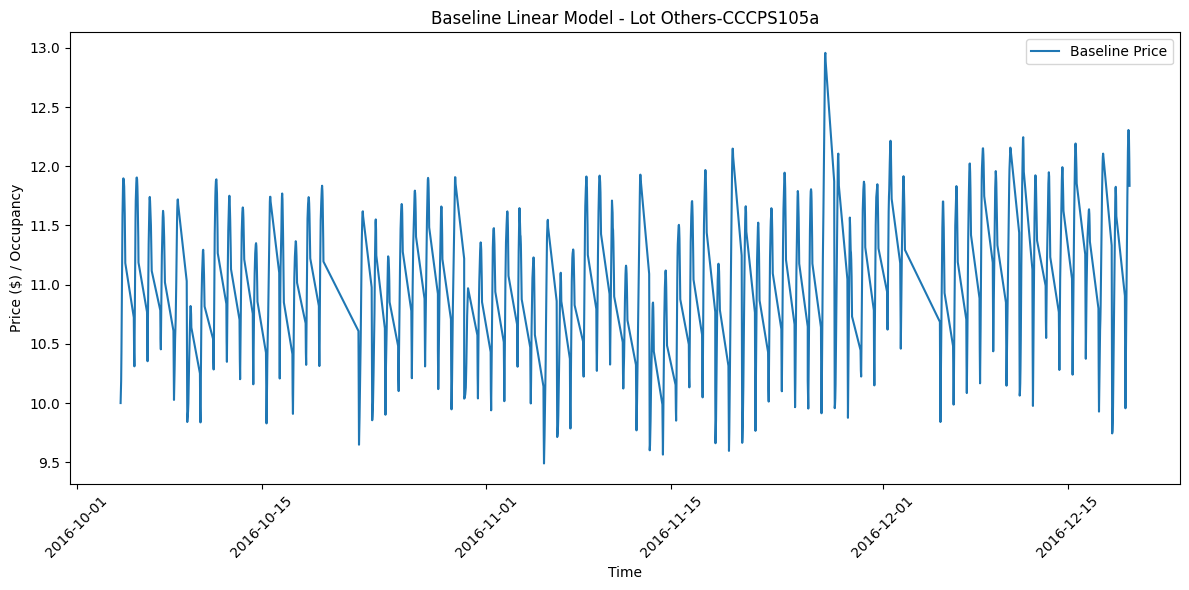

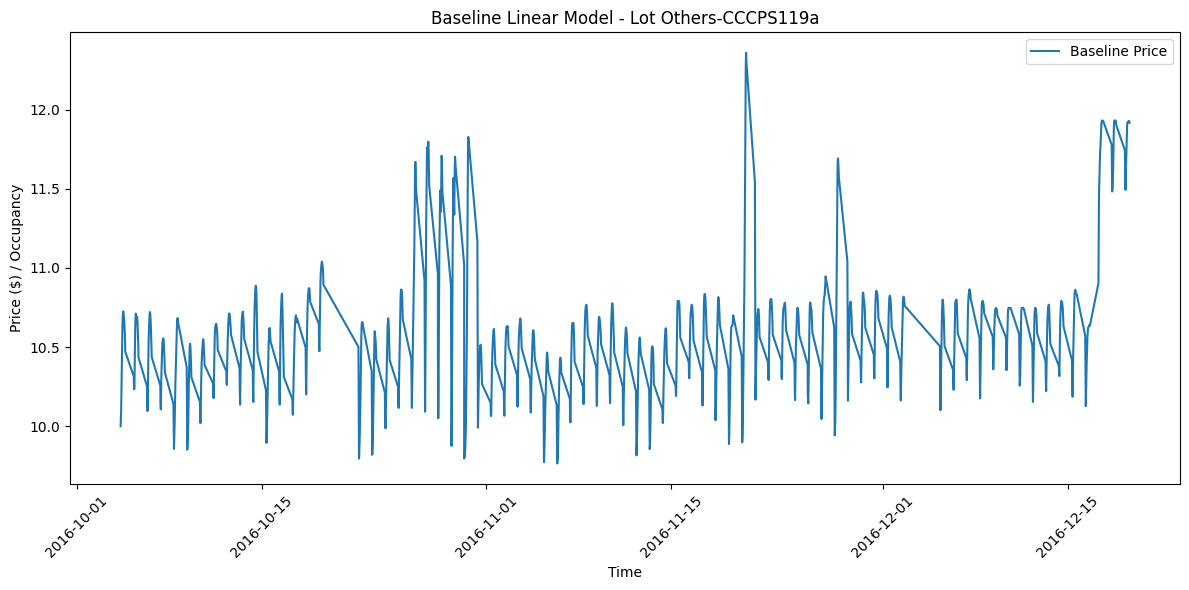

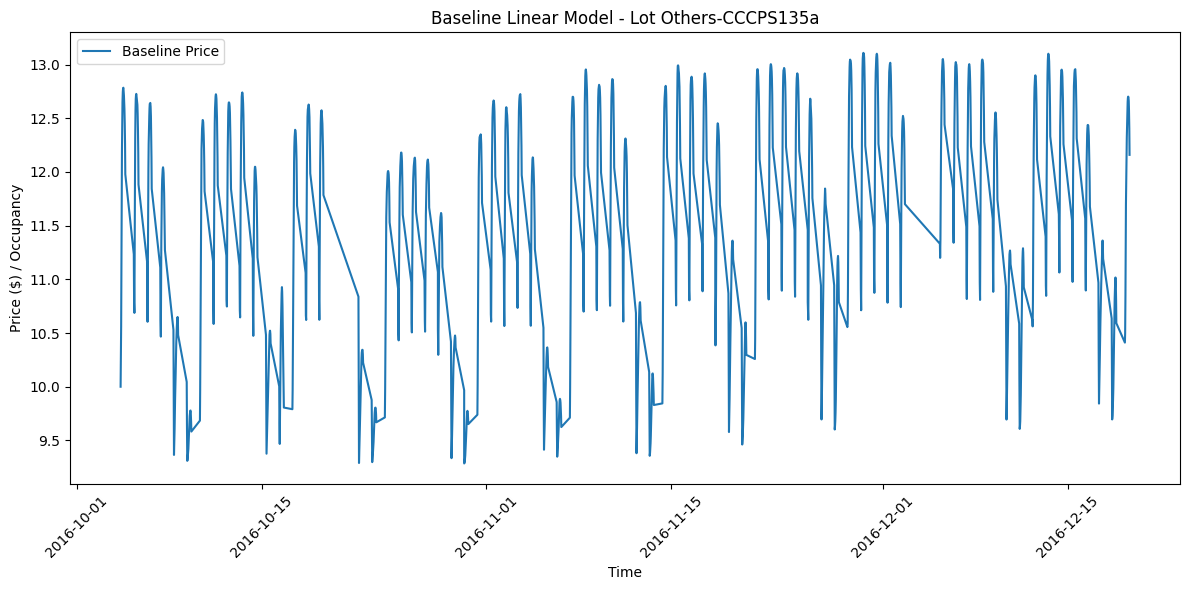

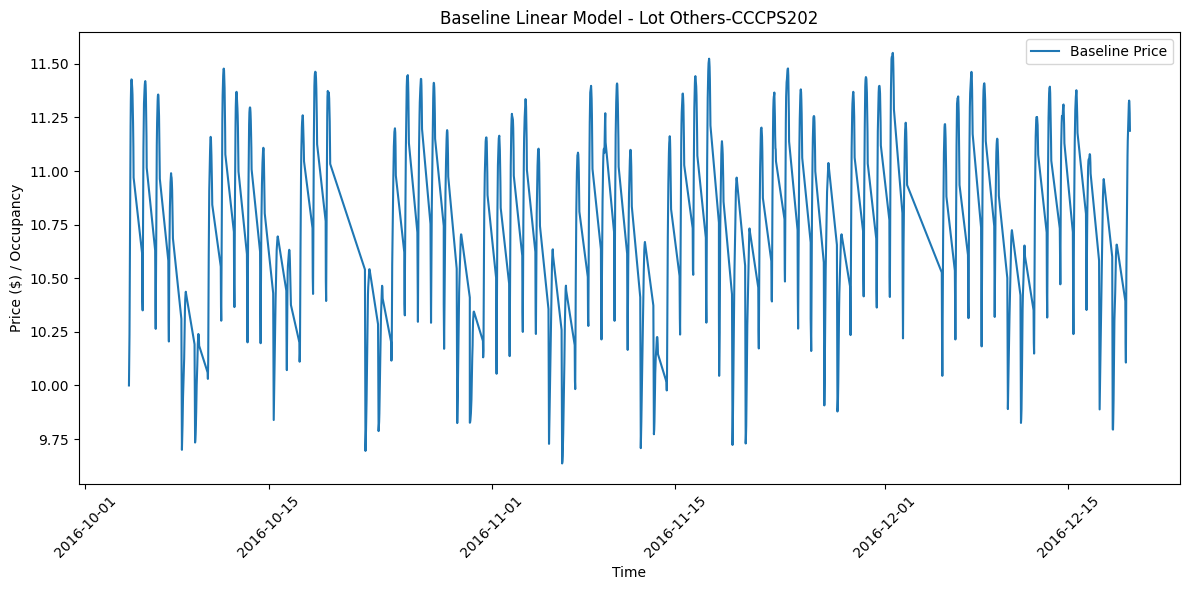

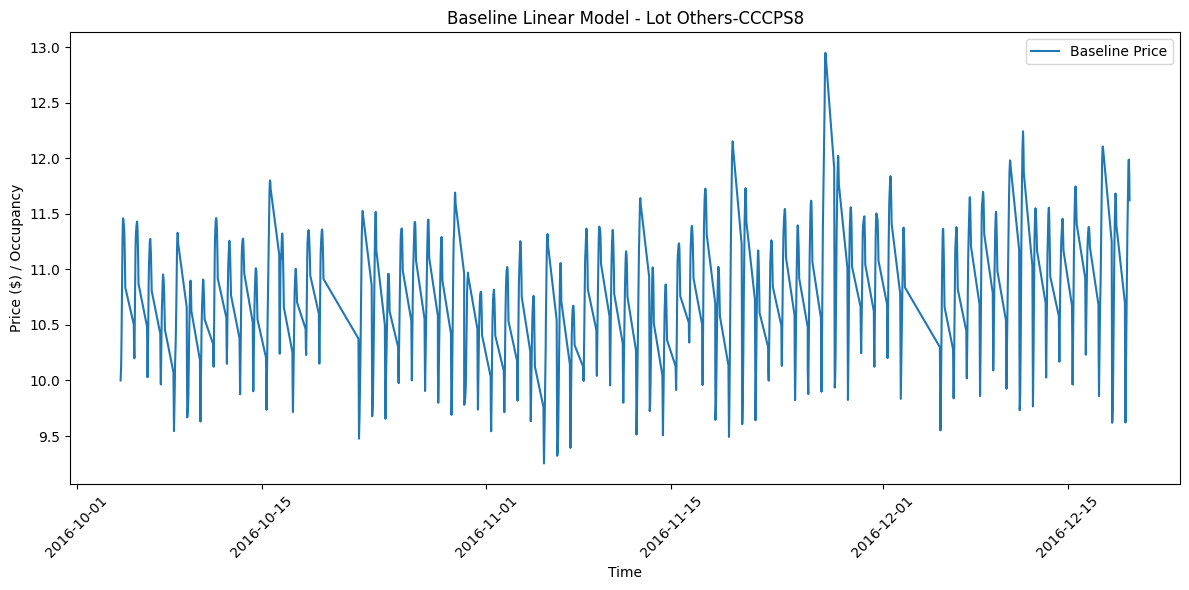

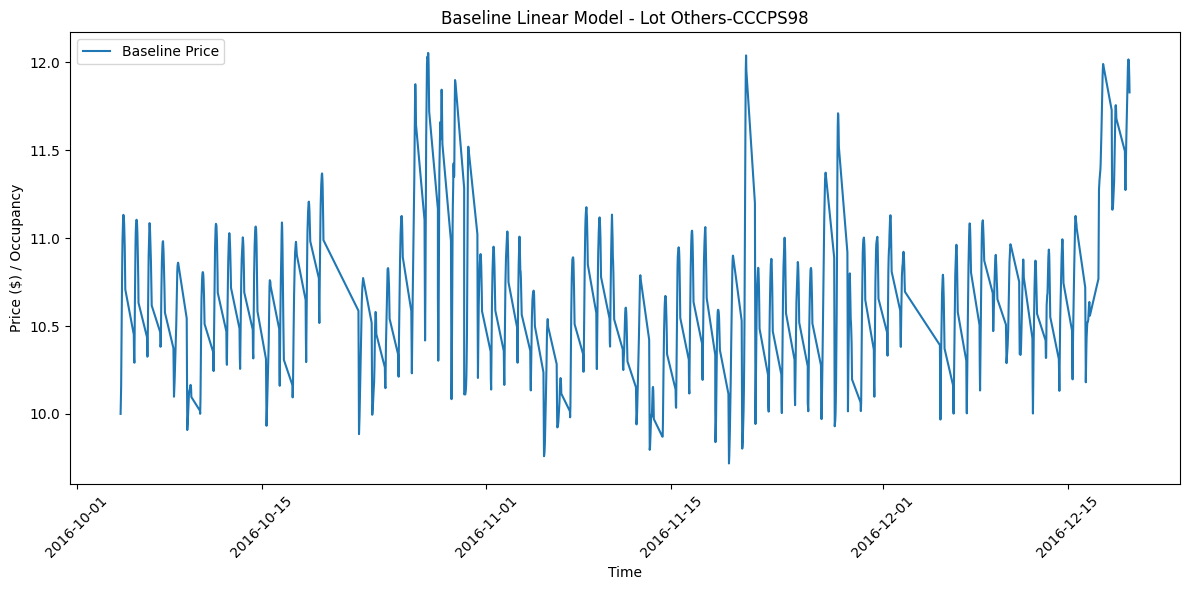

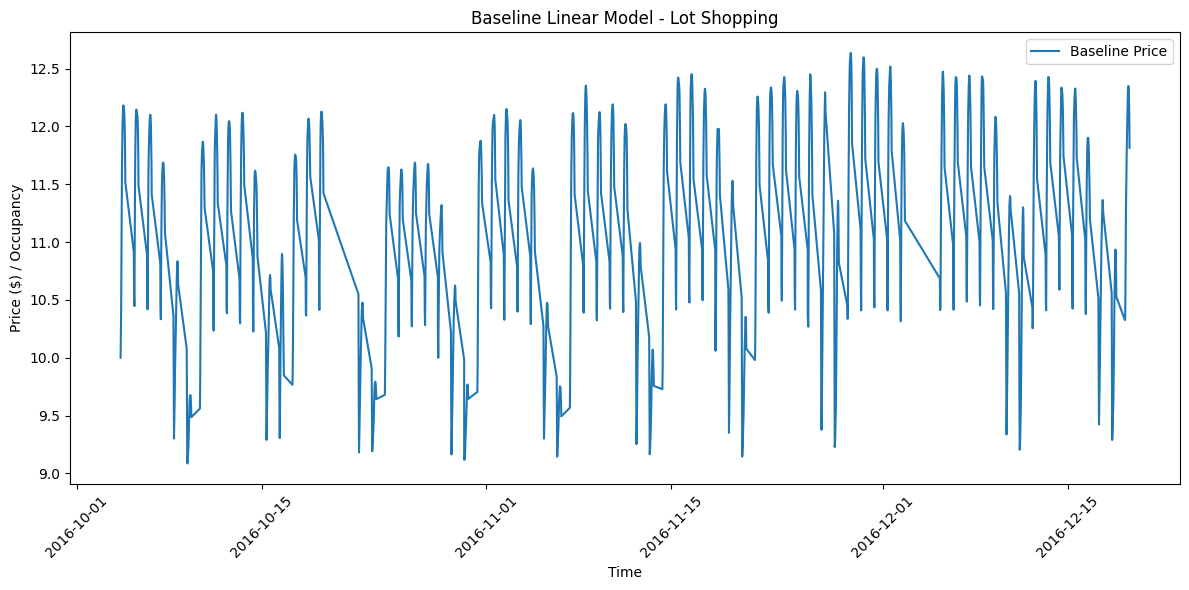

In [89]:
def demand_based_model(df, SystemCodeNumber, base_price=10.0, λ = 0.3, alpha=1, beta = 0.5, gamma = 0.2, delta = 0.3, epsilon = 0.3):

  lot_df = df[df['SystemCodeNumber'] == SystemCodeNumber].copy()
  lot_df = lot_df.sort_values(by='Timestamp')

  vehicle_weight_map = {'car': 1.0, 'bike': 0.5, 'truck': 1.5, 'cycle': 0.2}
  traffic_weight_map = {'low': 1.0, 'average': 1.5, 'high': 2.0}

  prices = [base_price]
  demands = []

  for i in range (len(lot_df)):
    #Demand = α*(Occupancy/Capacity) + β*QueueLength - γ*Traffic + δ*IsSpecialDay + ε*VehicleTypeWeight  
    occ = lot_df.iloc[i]['Occupancy'] / lot_df.iloc[i]['Capacity']
    queue = lot_df.iloc[i]['QueueLength']/lot_df.QueueLength.max()
    traffic = traffic_weight_map.get(lot_df.iloc[i]['TrafficConditionNearby'])
    special = lot_df.iloc[i]['IsSpecialDay']
    vehicle_weight = vehicle_weight_map.get(lot_df.iloc[i]['VehicleType'], 1.0)

    demand_raw = (alpha * occ
                  + beta * queue 
                  - gamma * traffic 
                  - delta * special 
                  + epsilon * vehicle_weight)
    
    demands.append(demand_raw)

    if i == 0:
      continue
    
    new_price = base_price * (1 + λ * demand_raw)
    new_price = max(base_price * 0.5, min(new_price, base_price * 2))

    prices.append(new_price)

  lot_df = lot_df.reset_index(drop=True)
  lot_df['DemandRaw'] = demands
  lot_df['DemandBasedPrice'] = prices
  return lot_df

Lot = df.SystemCodeNumber.unique()

for lot_id in Lot:
    SystemCodeNumber = lot_id
    result_df = baseline_linear_model(df, SystemCodeNumber)
    
    plt.figure(figsize=(12, 6))
    plt.plot(result_df['Timestamp'], result_df['BaselinePrice'], label='Baseline Price')
    plt.title(f'Baseline Linear Model - Lot {SystemCodeNumber}')
    plt.xlabel('Time')
    plt.ylabel('Price ($) / Occupancy')
    plt.legend()
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

In [90]:
df.SystemCodeNumber.unique()

array(['BHMBCCMKT01', 'BHMBCCTHL01', 'BHMEURBRD01', 'BHMMBMMBX01',
       'BHMNCPHST01', 'BHMNCPNST01', 'Broad Street', 'Others-CCCPS105a',
       'Others-CCCPS119a', 'Others-CCCPS135a', 'Others-CCCPS202',
       'Others-CCCPS8', 'Others-CCCPS98', 'Shopping'], dtype=object)

In [91]:
df.QueueLength.max()

np.int64(15)

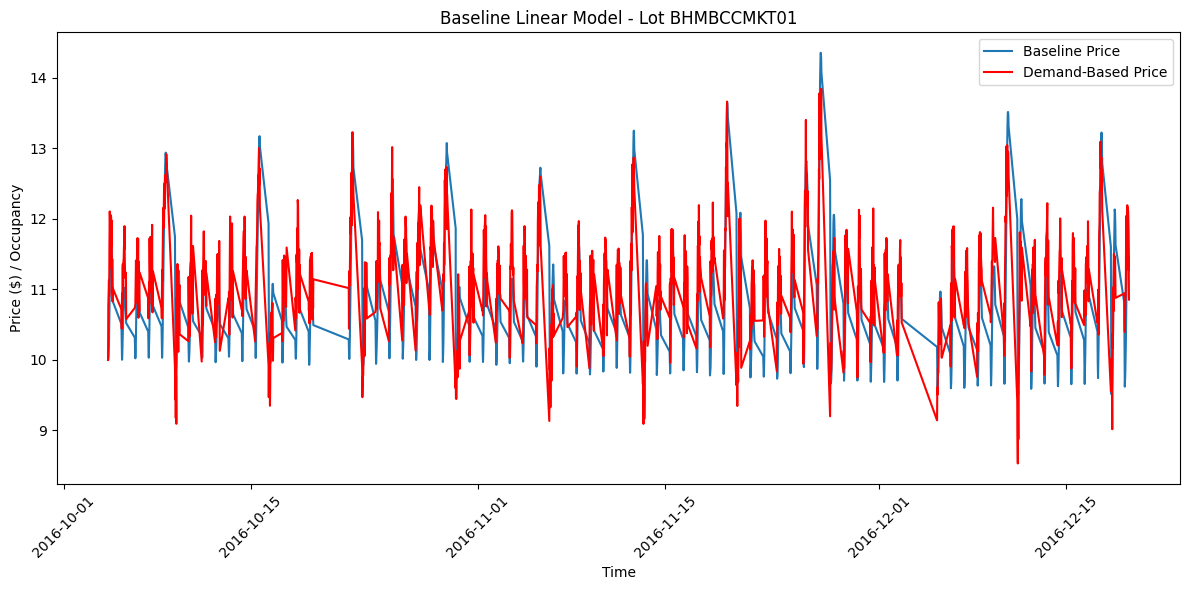

In [92]:
# Graph showing comparison between the two models

SystemCodeNumber = 'BHMBCCMKT01'
result_df_1 = baseline_linear_model(df, SystemCodeNumber)
result_df_2 = demand_based_model(df, SystemCodeNumber)
    
plt.figure(figsize=(12, 6))
plt.plot(result_df_1['Timestamp'], result_df_1['BaselinePrice'], label='Baseline Price')
plt.plot(result_df_2['Timestamp'], result_df_2['DemandBasedPrice'], label='Demand-Based Price', color='red')
plt.title(f'Baseline Linear Model - Lot {SystemCodeNumber}')
plt.xlabel('Time')
plt.ylabel('Price ($) / Occupancy')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### MODEL 3

/var/folders/mj/znx7lb6x1032hhf0_dlvvp3r0000gn/T/ipykernel_94383/3530714867.py:104: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')


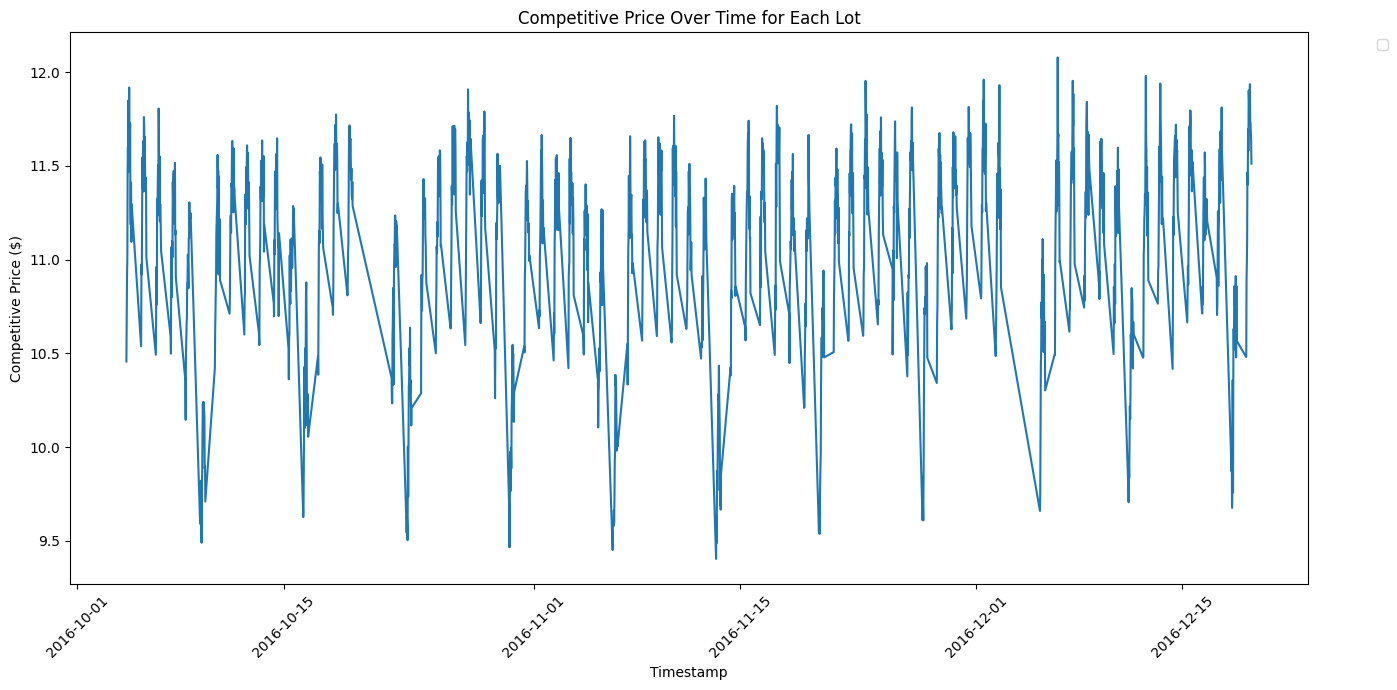

ID  SystemCodeNumber  Capacity   Latitude  Longitude  Occupancy  \
933  10117  Others-CCCPS105a      2009  26.147473  91.728049       1914   

    VehicleType TrafficConditionNearby  QueueLength  IsSpecialDay  ...  \
933        bike                    low            3             0  ...   

    QueueNormalised VehicleWeight  TrafficWeight    Demand  DemandBasedPrice  \
933             0.2           0.5            1.0  1.002713         13.008138   

     CompetitorPrice  CompetitivePrice  ShouldReroute    RerouteToLotID  \
933        12.310966         11.810966              1  Others-CCCPS119a   

              Timestamp  
933 2016-11-26 15:28:00  

[1 rows x 23 columns]

In [93]:
# Taking a group of lots close to each other (Here I've taken the 'Others-CCCPS' group)
dataframes = []
SystemCodeNumbers = ['Others-CCCPS105a', 'Others-CCCPS119a', 'Others-CCCPS135a', 'Others-CCCPS202', 'Others-CCCPS8', 'Others-CCCPS98']

# Importing data in each dataframe
for i in SystemCodeNumbers:
  dataframes.append(pd.read_csv(f'dataset_{i}.csv'))

# Setting up parameters
base_price = 10.0
lambda_ = 0.3
alpha = 1.0
beta = 0.5
gamma = 0.2
delta = 0.3
epsilon = 0.3
queue_max = 15
undercut = 0.5

# Mapping vehicle and traffic weights

vehicle_weight_map = {
    "car": 1.0,
    "bike": 0.5,
    "truck": 1.5,
    "cycle": 0.2
}

traffic_weight_map = {
    "low": 1.0,
    "average": 1.5,
    "high": 2.0
}

# Function to allot a lot to reroute to (allots the lot with lowest occupancy near it)

def find_reroute_lot(row_idx):
        current_occ = occ_matrix[row_idx, idx]
        # Mask out this lot
        occ_copy = occ_matrix[row_idx].copy()
        occ_copy[idx] = np.inf  # exclude current lot by setting it very high
        min_idx = np.argmin(occ_copy)
        return SystemCodeNumbers[min_idx]

# Calculating demand based prices similarly to model 2

for idx, df in enumerate(dataframes):
    df["OccRate"] = df["Occupancy"] / df["Capacity"]
    df["QueueNormalised"] = df["QueueLength"] / queue_max

    df["VehicleWeight"] = df["VehicleType"].map(vehicle_weight_map).fillna(1.0)
    df["TrafficWeight"] = df["TrafficConditionNearby"].map(traffic_weight_map).fillna(1.0)


    df["Demand"] = (
        alpha * df["OccRate"]
        + beta * df["QueueNormalised"]
        - gamma * df["TrafficWeight"]
        - delta * df["IsSpecialDay"]
        + epsilon * df["VehicleWeight"]
    )

    df["DemandBasedPrice"] = base_price * (1 + lambda_ * df["Demand"])
    df["DemandBasedPrice"] = df["DemandBasedPrice"].clip(lower=base_price*0.5, upper=base_price*2)

    dataframes[idx] = df

# Create a demand price matrix with (Each column is from one DataFrame’s DemandBasedPrice) and (Each row represents the same index across all DataFrames)
occ_matrix = np.column_stack([df["OccRate"].values for df in dataframes])
demand_price_matrix = np.column_stack([df_["DemandBasedPrice"].values for df_ in dataframes])
    
# calculate competitive price, it is minumum of original demand based price and (mean competitors price -0.5 USD)
for idx, df in enumerate(dataframes):
    df["CompetitorPrice"] = demand_price_matrix.mean(axis=1)
    df["CompetitivePrice"] = df[["DemandBasedPrice", "CompetitorPrice"]].apply(
        lambda row: min(row["DemandBasedPrice"], row["CompetitorPrice"] - undercut),
        axis=1)
    df["CompetitivePrice"] = df["CompetitivePrice"].clip(lower=base_price*0.5, upper=base_price*2)

    # Set ShouldReroute to 1 if the occupancy_rate is greater than (or equal to) 0.95
    df["ShouldReroute"] = df.apply(
        lambda row: 1 if row["OccRate"] >= 0.95 else 0,
        axis=1
    )

    # Assign the lot to Reroute to
    df["RerouteToLotID"] = [
        find_reroute_lot(row_idx) if df.loc[row_idx, "ShouldReroute"] == 1 else None
        for row_idx in range(len(df))
    ]

    # Create the Timestamp column for plotting graph
    df["Timestamp"] = pd.to_datetime(df["LastUpdatedDate"] + " " + df["LastUpdatedTime"], dayfirst=True)

    dataframes[idx] = df

# Visualizing with matplotlib

plt.figure(figsize=(14, 7))
plt.plot(dataframes[0]["Timestamp"], dataframes[0]["CompetitivePrice"])
plt.xlabel("Timestamp")
plt.ylabel("Competitive Price ($)")
plt.title("Competitive Price Over Time for Each Lot")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Showing an entry that has been Rerouted to another nearby lot
dataframes[0][dataframes[0].ShouldReroute == 1]


### Further I've implemented model-3 for other groups of parking lots

/var/folders/mj/znx7lb6x1032hhf0_dlvvp3r0000gn/T/ipykernel_94383/4193346287.py:103: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')


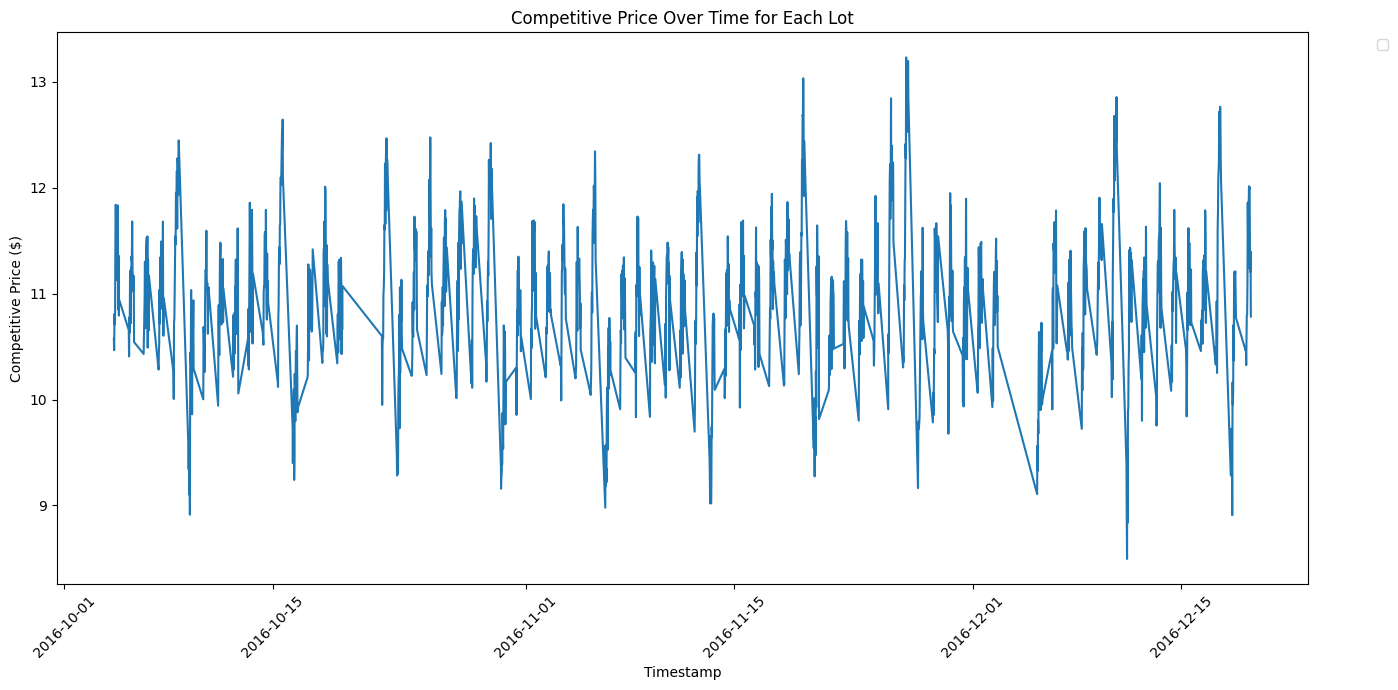

ID SystemCodeNumber  Capacity   Latitude  Longitude  Occupancy  \
930  930      BHMBCCMKT01       577  26.144536  91.736172        551   
931  931      BHMBCCMKT01       577  26.144536  91.736172        573   
932  932      BHMBCCMKT01       577  26.144536  91.736172        567   
933  933      BHMBCCMKT01       577  26.144536  91.736172        551   

    VehicleType TrafficConditionNearby  QueueLength  IsSpecialDay  ...  \
930         car                average            4             0  ...   
931         car                   high            7             0  ...   
932        bike                    low            2             0  ...   
933         car                average            2             0  ...   

    QueueNormalised VehicleWeight  TrafficWeight    Demand  DemandBasedPrice  \
930        0.266667           1.0            1.5  1.088273         13.264818   
931        0.466667           1.0            2.0  1.126401         13.379203   
932        0.133333           0.5            1.0  0.999336         12.998007   
933        0.133333           1.0            1.5  1.021606         13.064818   

     CompetitorPrice  CompetitivePrice  ShouldReroute  RerouteToLotID  \
930        13.340549         12.840549              1     BHMBCCTHL01   
931        13.026113         12.526113              1     BHMBCCTHL01   
932        13.253267         12.753267              1     BHMBCCTHL01   
933        13.225045         12.725045              1     BHMBCCTHL01   

              Timestamp  
930 2016-11-26 14:01:00  
931 2016-11-26 14:41:00  
932 2016-11-26 15:01:00  
933 2016-11-26 15:28:00  

[4 rows x 23 columns]

In [94]:
dataframes = []
SystemCodeNumbers = ['BHMBCCMKT01', 'BHMBCCTHL01']

# Importing data in each dataframe
for i in SystemCodeNumbers:
  dataframes.append(pd.read_csv(f'dataset_{i}.csv'))

# Setting up parameters
base_price = 10.0
lambda_ = 0.3
alpha = 1.0
beta = 0.5
gamma = 0.2
delta = 0.3
epsilon = 0.3
queue_max = 15
undercut = 0.5

# Mapping vehicle and traffic weights

vehicle_weight_map = {
    "car": 1.0,
    "bike": 0.5,
    "truck": 1.5,
    "cycle": 0.2
}

traffic_weight_map = {
    "low": 1.0,
    "average": 1.5,
    "high": 2.0
}

# Function to allot a lot to reroute to (allots the lot with lowest occupancy near it)

def find_reroute_lot(row_idx):
        current_occ = occ_matrix[row_idx, idx]
        # Mask out this lot
        occ_copy = occ_matrix[row_idx].copy()
        occ_copy[idx] = np.inf  # exclude current lot by setting it very high
        min_idx = np.argmin(occ_copy)
        return SystemCodeNumbers[min_idx]

# Calculating demand based prices similarly to model 2

for idx, df in enumerate(dataframes):
    df["OccRate"] = df["Occupancy"] / df["Capacity"]
    df["QueueNormalised"] = df["QueueLength"] / queue_max

    df["VehicleWeight"] = df["VehicleType"].map(vehicle_weight_map).fillna(1.0)
    df["TrafficWeight"] = df["TrafficConditionNearby"].map(traffic_weight_map).fillna(1.0)


    df["Demand"] = (
        alpha * df["OccRate"]
        + beta * df["QueueNormalised"]
        - gamma * df["TrafficWeight"]
        - delta * df["IsSpecialDay"]
        + epsilon * df["VehicleWeight"]
    )

    df["DemandBasedPrice"] = base_price * (1 + lambda_ * df["Demand"])
    df["DemandBasedPrice"] = df["DemandBasedPrice"].clip(lower=base_price*0.5, upper=base_price*2)

    dataframes[idx] = df

# Create a demand price matrix with (Each column is from one DataFrame’s DemandBasedPrice) and (Each row represents the same index across all DataFrames)
occ_matrix = np.column_stack([df["OccRate"].values for df in dataframes])
demand_price_matrix = np.column_stack([df_["DemandBasedPrice"].values for df_ in dataframes])
    
# calculate competitive price, it is minumum of original demand based price and (mean competitors price -0.5 USD)
for idx, df in enumerate(dataframes):
    df["CompetitorPrice"] = demand_price_matrix.mean(axis=1)
    df["CompetitivePrice"] = df[["DemandBasedPrice", "CompetitorPrice"]].apply(
        lambda row: min(row["DemandBasedPrice"], row["CompetitorPrice"] - undercut),
        axis=1)
    df["CompetitivePrice"] = df["CompetitivePrice"].clip(lower=base_price*0.5, upper=base_price*2)

    # Set ShouldReroute to 1 if the occupancy_rate is greater than (or equal to) 0.95
    df["ShouldReroute"] = df.apply(
        lambda row: 1 if row["OccRate"] >= 0.95 else 0,
        axis=1
    )

    # Assign the lot to Reroute to
    df["RerouteToLotID"] = [
        find_reroute_lot(row_idx) if df.loc[row_idx, "ShouldReroute"] == 1 else None
        for row_idx in range(len(df))
    ]

    # Create the Timestamp column for plotting graph
    df["Timestamp"] = pd.to_datetime(df["LastUpdatedDate"] + " " + df["LastUpdatedTime"], dayfirst=True)

    dataframes[idx] = df

# Visualizing with matplotlib

plt.figure(figsize=(14, 7))
plt.plot(dataframes[0]["Timestamp"], dataframes[0]["CompetitivePrice"])
plt.xlabel("Timestamp")
plt.ylabel("Competitive Price ($)")
plt.title("Competitive Price Over Time for Each Lot")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Showing entry that has been Rerouted to another nearby lot
dataframes[0][dataframes[0].ShouldReroute == 1]


In [95]:
# All other parking lots are distributed away from each other (I only applied the competitive logic to the clusters)